In [1]:
import pandas as pd

# Load dataset
file_path = "Stunting_Dataset.csv"
data = pd.read_csv(file_path)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         10000 non-null  object 
 1   Age            10000 non-null  int64  
 2   Birth Weight   10000 non-null  float64
 3   Birth Length   10000 non-null  int64  
 4   Body Weight    10000 non-null  float64
 5   Body Length    10000 non-null  float64
 6   Breastfeeding  10000 non-null  object 
 7   Stunting       10000 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 625.1+ KB


In [2]:
data.head()

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Stunting
0,Male,17,3.0,49,10.0,72.2,No,No
1,Female,11,2.9,49,2.9,65.0,No,Yes
2,Male,16,2.9,49,8.5,72.2,No,Yes
3,Male,31,2.8,49,6.4,63.0,No,Yes
4,Male,15,3.1,49,10.5,49.0,No,Yes


In [3]:
data = data.rename(columns={
    'Gender': 'jenis_kelamin',
    'Age': 'usia_bulan',
    'Birth Weight': 'berat_lahir_kg',
    'Birth Length': 'tinggi_lahir_cm',
    'Body Weight': 'berat_badan_kg',
    'Body Length': 'tinggi_badan_cm',
    'Breastfeeding': 'status_asi',
    'Stunting': 'status_stunting'
})


In [4]:
# Ganti nilai kolom 'jenis_kelamin' dari Male/Female ke Laki-laki/Perempuan
data['jenis_kelamin'] = data['jenis_kelamin'].replace({
    'Male': 'Laki-laki',
    'Female': 'Perempuan',
    'male': 'Laki-laki',
    'female': 'Perempuan'
})

# Ganti nilai kolom 'status_asi' dari Yes/No ke Ya/Tidak
data['status_asi'] = data['status_asi'].replace({
    'Yes': 'Ya',
    'No': 'Tidak',
    'yes': 'Ya',
    'no': 'Tidak'
})

# Jika kolom 'status_stunting' masih ada bentuk Yes/No (bukan numerik)
if data['status_stunting'].dtype == 'object':
    data['status_stunting'] = data['status_stunting'].replace({
        'Yes': 'Stunting',
        'No': 'Tidak Stunting',
        'yes': 'Stunting',
        'no': 'Tidak Stunting'
    })

# Cek hasil perubahan
print("\nNilai unik pada kolom jenis_kelamin:", data['jenis_kelamin'].unique())
print("Nilai unik pada kolom status_asi:", data['status_asi'].unique())
print("Nilai unik pada kolom status_stunting:", data['status_stunting'].unique())



Nilai unik pada kolom jenis_kelamin: ['Laki-laki' 'Perempuan']
Nilai unik pada kolom status_asi: ['Tidak']
Nilai unik pada kolom status_stunting: ['Tidak Stunting' 'Stunting']


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pisahkan kolom numerik dan kategorikal
kolom_numerik = data.select_dtypes(include=['int64', 'float64']).columns
kolom_kategorikal = data.select_dtypes(include='object').columns

# === 1️⃣ Statistika deskriptif numerik ===
print("📊 Statistika Deskriptif - Variabel Numerik")
display(data[kolom_numerik].describe().T)

# === 2️⃣ Statistika deskriptif kategorikal ===
print("\n📋 Statistika Deskriptif - Variabel Kategorikal")
display(data[kolom_kategorikal].describe().T)


📊 Statistika Deskriptif - Variabel Numerik


,count,mean,std,min,25%,50%,75%,max
usia_bulan,10000.0,14.25500,7.923285,6.0,10.0,13.0,15.0,48.0
berat_lahir_kg,10000.0,2.75760,0.291092,2.0,2.8,2.8,2.9,3.1
tinggi_lahir_cm,10000.0,49.11740,0.439814,48.0,49.0,49.0,49.0,50.0
berat_badan_kg,10000.0,7.63199,1.720461,2.9,6.4,7.7,9.0,10.5
tinggi_badan_cm,10000.0,68.85492,8.906640,49.0,65.0,68.3,72.2,92.7



📋 Statistika Deskriptif - Variabel Kategorikal


,count,unique,top,freq
jenis_kelamin,10000,2,Laki-laki,6204
status_asi,10000,1,Tidak,10000
status_stunting,10000,2,Stunting,7955



📈 Distribusi Variabel Numerik


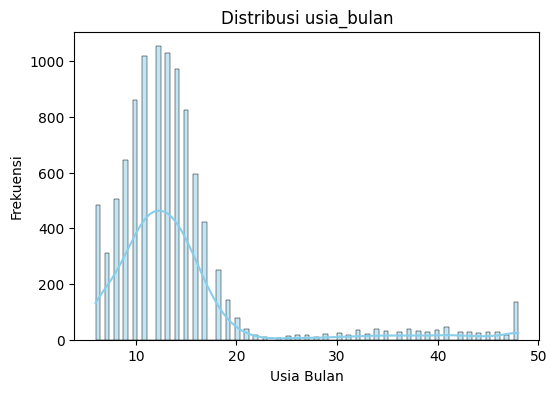

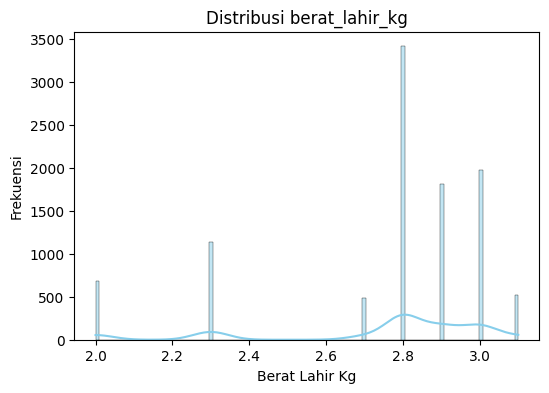

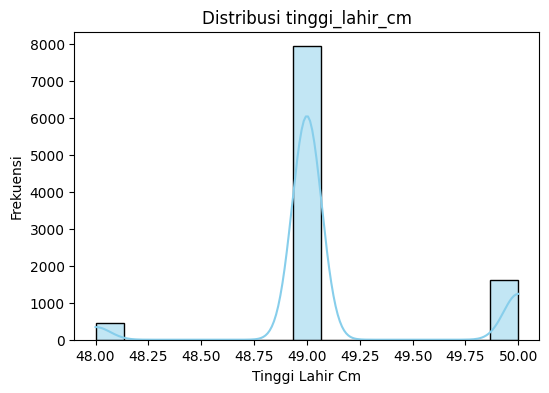

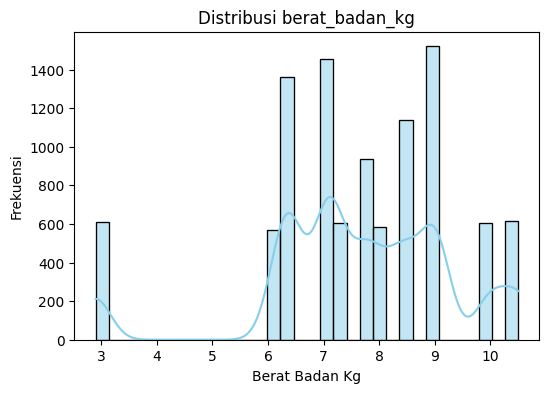

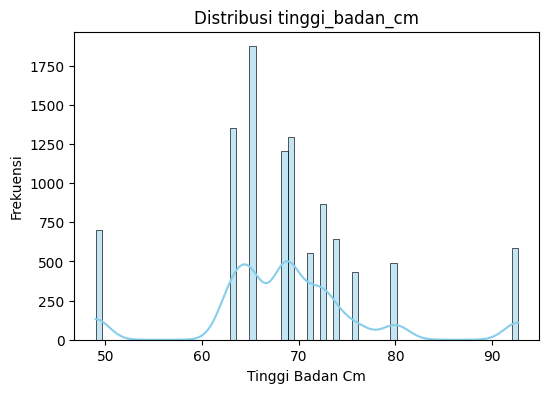


📊 Distribusi Variabel Kategorikal


C:\Users\Zarah Sabrina\AppData\Local\Temp\ipykernel_33768\484729434.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[kolom], palette='Set2')


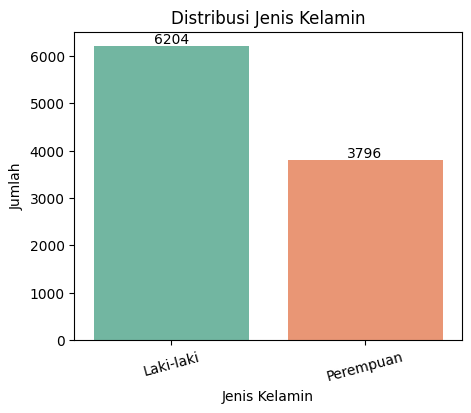

C:\Users\Zarah Sabrina\AppData\Local\Temp\ipykernel_33768\484729434.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[kolom], palette='Set2')


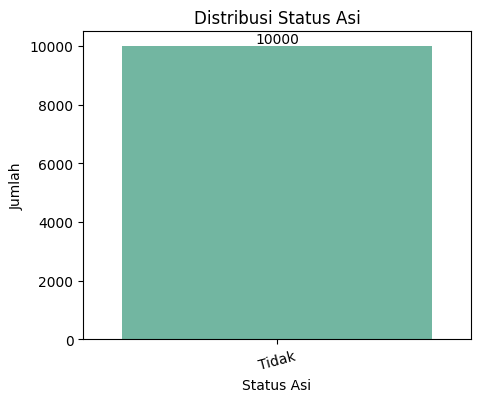

C:\Users\Zarah Sabrina\AppData\Local\Temp\ipykernel_33768\484729434.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data[kolom], palette='Set2')


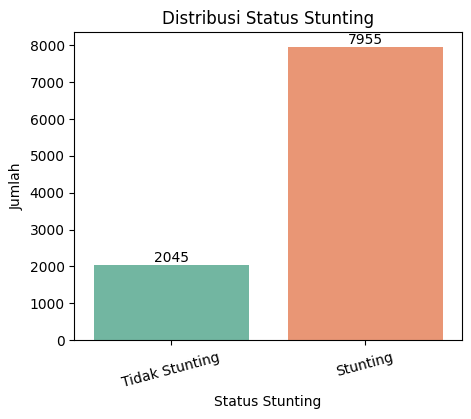

In [6]:
# === 3️⃣ Visualisasi distribusi variabel numerik ===
print("\n📈 Distribusi Variabel Numerik")
for kolom in kolom_numerik:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[kolom], kde=True, color='skyblue')
    plt.title(f'Distribusi {kolom}')
    plt.xlabel(kolom.replace('_', ' ').title())
    plt.ylabel('Frekuensi')
    plt.show()

# === 4️⃣ Visualisasi distribusi variabel kategorikal ===
print("\n📊 Distribusi Variabel Kategorikal")
for kolom in kolom_kategorikal:
    plt.figure(figsize=(5, 4))
    ax = sns.countplot(x=data[kolom], palette='Set2')
    plt.title(f'Distribusi {kolom.replace("_", " ").title()}')
    plt.xlabel(kolom.replace('_', ' ').title())
    plt.ylabel('Jumlah')
    plt.xticks(rotation=15)

    # Tambahkan label jumlah di atas batang
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge')
    
    plt.show()


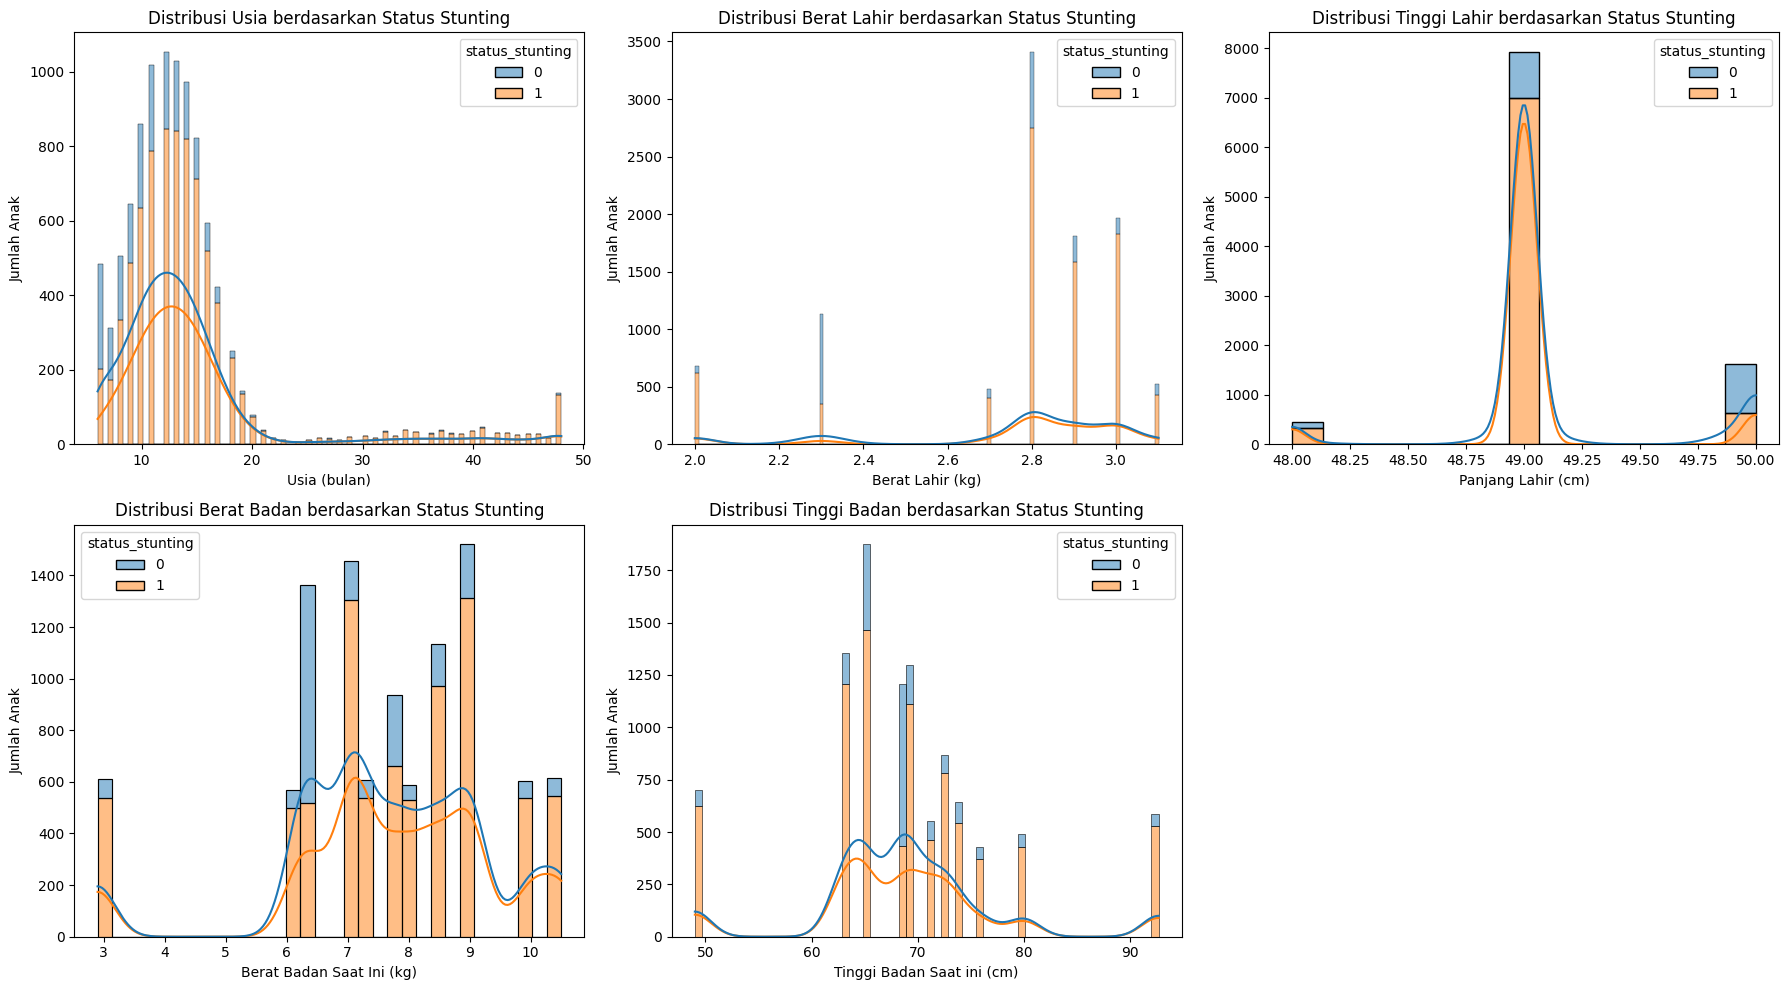

,usia_bulan,berat_lahir_kg,tinggi_lahir_cm,berat_badan_kg,tinggi_badan_cm,status_stunting
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,14.255000,2.757600,49.117400,7.631990,68.85492,0.795500
std,7.923285,0.291092,0.439814,1.720461,8.90664,0.403356
min,6.000000,2.000000,48.000000,2.900000,49.00000,0.000000
25%,10.000000,2.800000,49.000000,6.400000,65.00000,1.000000
50%,13.000000,2.800000,49.000000,7.700000,68.30000,1.000000
75%,15.000000,2.900000,49.000000,9.000000,72.20000,1.000000
max,48.000000,3.100000,50.000000,10.500000,92.70000,1.000000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ubah target 'status_stunting' ke numerik
data['status_stunting'] = data['status_stunting'].map({'Stunting': 1, 'Tidak Stunting': 0})

# Statistik dasar
summary = data.describe()

# Plot distribusi
plt.figure(figsize=(18, 10))

# 1️⃣ Distribusi Usia
plt.subplot(2, 3, 1)
sns.histplot(data, x='usia_bulan', hue='status_stunting', multiple='stack', kde=True)
plt.title('Distribusi Usia berdasarkan Status Stunting')
plt.xlabel('Usia (bulan)')
plt.ylabel('Jumlah Anak')

# 2️⃣ Distribusi Berat Lahir
plt.subplot(2, 3, 2)
sns.histplot(data, x='berat_lahir_kg', hue='status_stunting', multiple='stack', kde=True)
plt.title('Distribusi Berat Lahir berdasarkan Status Stunting')
plt.xlabel('Berat Lahir (kg)')
plt.ylabel('Jumlah Anak')

# 3️⃣ Distribusi Panjang Lahir
plt.subplot(2, 3, 3)
sns.histplot(data, x='tinggi_lahir_cm', hue='status_stunting', multiple='stack', kde=True)
plt.title('Distribusi Tinggi Lahir berdasarkan Status Stunting')
plt.xlabel('Panjang Lahir (cm)')
plt.ylabel('Jumlah Anak')

# 4️⃣ Distribusi Berat Badan Saat Ini
plt.subplot(2, 3, 4)
sns.histplot(data, x='berat_badan_kg', hue='status_stunting', multiple='stack', kde=True)
plt.title('Distribusi Berat Badan berdasarkan Status Stunting')
plt.xlabel('Berat Badan Saat Ini (kg)')
plt.ylabel('Jumlah Anak')

# 5️⃣ Distribusi Tinggi/Panjang Badan Saat Ini
plt.subplot(2, 3, 5)
sns.histplot(data, x='tinggi_badan_cm', hue='status_stunting', multiple='stack', kde=True)
plt.title('Distribusi Tinggi Badan berdasarkan Status Stunting')
plt.xlabel('Tinggi Badan Saat ini (cm)')
plt.ylabel('Jumlah Anak')

plt.tight_layout()
plt.show()

# Statistik ringkas
summary


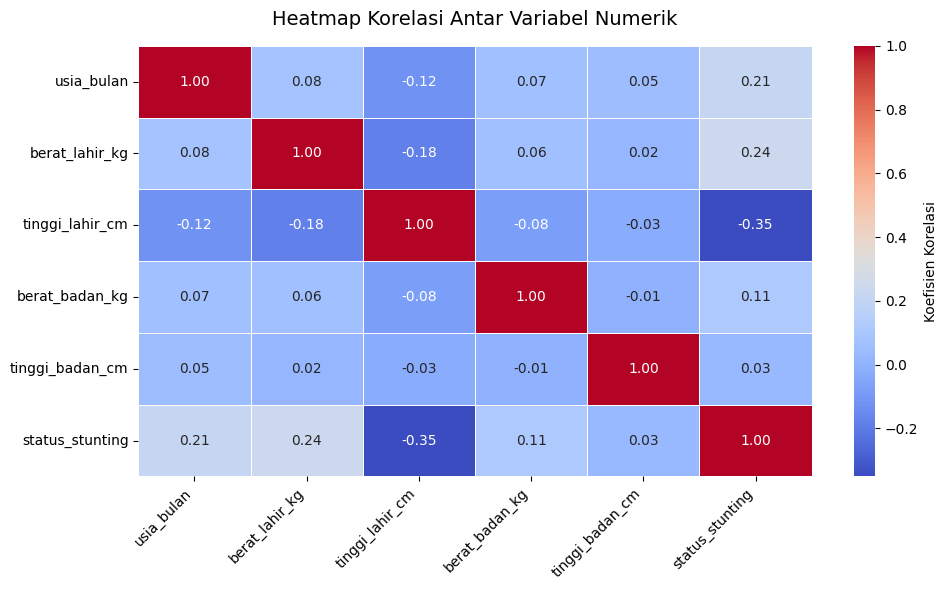

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Pastikan kolom status_stunting sudah numerik ---
if data['status_stunting'].dtype == 'object':
    data['status_stunting'] = (
        data['status_stunting']
        .astype(str).str.strip().str.lower()
        .map({'ya': 1, 'tidak': 0, 'yes': 1, 'no': 0})
        .astype('Int64')
    )

# --- Pilih hanya kolom numerik ---
kolom_numerik = data.select_dtypes(include=['int64', 'float64', 'Int64']).columns

# --- Hitung korelasi antar variabel numerik ---
korelasi = data[kolom_numerik].corr()

# --- Plot heatmap ---
plt.figure(figsize=(10, 6))
sns.heatmap(
    korelasi,
    annot=True,              # tampilkan nilai korelasi di dalam sel
    fmt=".2f",               # dua angka di belakang koma
    cmap="coolwarm",         # warna dari biru (negatif) ke merah (positif)
    linewidths=0.5,          # garis pemisah antar sel
    cbar_kws={'label': 'Koefisien Korelasi'}
)

plt.title("Heatmap Korelasi Antar Variabel Numerik", fontsize=14, pad=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [9]:
import pandas as pd

# --- 1️⃣ Cek Missing Value (data kosong) ---
print("🔍 Jumlah Missing Value per Kolom:\n")
print(data.isnull().sum())
print("\n")

# Persentase missing value biar lebih jelas
print("📊 Persentase Missing Value per Kolom (%):\n")
print(round((data.isnull().sum() / len(data)) * 100, 2))
print("\n")


🔍 Jumlah Missing Value per Kolom:

jenis_kelamin      0
usia_bulan         0
berat_lahir_kg     0
tinggi_lahir_cm    0
berat_badan_kg     0
tinggi_badan_cm    0
status_asi         0
status_stunting    0
dtype: int64


📊 Persentase Missing Value per Kolom (%):

jenis_kelamin      0.0
usia_bulan         0.0
berat_lahir_kg     0.0
tinggi_lahir_cm    0.0
berat_badan_kg     0.0
tinggi_badan_cm    0.0
status_asi         0.0
status_stunting    0.0
dtype: float64




In [10]:
# Hitung jumlah duplikat yang identik di semua kolom
jumlah_duplikat_identik = data.duplicated(keep=False).sum()

print(f"📑 Jumlah baris duplikat yang benar-benar identik di semua kolom: {jumlah_duplikat_identik}")

# Tampilkan contoh baris duplikat identik jika ada
duplikat_identik = data[data.duplicated(keep=False)]
if not duplikat_identik.empty:
    print("\n🧾 Contoh baris yang benar-benar identik di semua kolom:")
    display(duplikat_identik.sort_values(by=list(data.columns)).head(10))
else:
    print("✅ Tidak ada baris yang benar-benar identik di semua kolom.")


📑 Jumlah baris duplikat yang benar-benar identik di semua kolom: 3816

🧾 Contoh baris yang benar-benar identik di semua kolom:


,jenis_kelamin,usia_bulan,berat_lahir_kg,tinggi_lahir_cm,berat_badan_kg,tinggi_badan_cm,status_asi,status_stunting
2540,Laki-laki,6,2.3,48,6.4,68.3,Tidak,0
8569,Laki-laki,6,2.3,48,6.4,68.3,Tidak,0
61,Laki-laki,6,2.3,49,6.4,68.3,Tidak,0
1176,Laki-laki,6,2.3,49,6.4,68.3,Tidak,0
3852,Laki-laki,6,2.3,49,6.4,68.3,Tidak,0
6218,Laki-laki,6,2.3,49,6.4,68.3,Tidak,0
7018,Laki-laki,6,2.3,49,6.4,68.3,Tidak,0
7875,Laki-laki,6,2.3,49,6.4,68.3,Tidak,0
1021,Laki-laki,6,2.3,49,7.7,68.3,Tidak,0
1315,Laki-laki,6,2.3,49,7.7,68.3,Tidak,0


In [11]:
# 0) ukuran awal
n_awal = len(data)

# 1) hapus duplikat yang identik di SEMUA kolom
data = data.drop_duplicates(keep='first').reset_index(drop=True)

# 2) ringkasan
n_akhir = len(data)
n_dibuang = n_awal - n_akhir
print(f"Baris awal : {n_awal}")
print(f"Baris akhir: {n_akhir}")
print(f"Duplikat identik dibuang: {n_dibuang} ({n_dibuang/n_awal:.2%})")


Baris awal : 10000
Baris akhir: 7573
Duplikat identik dibuang: 2427 (24.27%)


In [12]:
import pandas as pd
import numpy as np

# Salin dataset biar aman
df = data.copy()

# --- 1️⃣ Rasio Tinggi terhadap Usia (indikator stunting kronis) ---
# Mengukur seberapa tinggi anak dibandingkan usianya (cm per bulan)
df['rasio_tinggi_usia'] = df['tinggi_badan_cm'] / df['usia_bulan']

# --- 2️⃣ Rasio Berat terhadap Usia (indikator underweight) ---
# Mengukur perkembangan berat badan anak terhadap umur (kg per bulan)
df['rasio_berat_usia'] = df['berat_badan_kg'] / df['usia_bulan']

# --- 3️⃣ Rasio Berat terhadap Tinggi (indikator wasting atau obesitas) ---
# Mengukur proporsionalitas tubuh (kg per cm)
df['rasio_berat_tinggi'] = df['berat_badan_kg'] / df['tinggi_badan_cm']

# --- Cek hasil ---
print("✅ Feature engineering berhasil! Fitur baru ditambahkan:")
print(['rasio_tinggi_usia', 'rasio_berat_usia', 'rasio_berat_tinggi'])

# Lihat beberapa sampel
df.head()


✅ Feature engineering berhasil! Fitur baru ditambahkan:
['rasio_tinggi_usia', 'rasio_berat_usia', 'rasio_berat_tinggi']


,jenis_kelamin,usia_bulan,berat_lahir_kg,tinggi_lahir_cm,berat_badan_kg,tinggi_badan_cm,status_asi,status_stunting,rasio_tinggi_usia,rasio_berat_usia,rasio_berat_tinggi
0,Laki-laki,17,3.0,49,10.0,72.2,Tidak,0,4.247059,0.588235,0.138504
1,Perempuan,11,2.9,49,2.9,65.0,Tidak,1,5.909091,0.263636,0.044615
2,Laki-laki,16,2.9,49,8.5,72.2,Tidak,1,4.512500,0.531250,0.117729
3,Laki-laki,31,2.8,49,6.4,63.0,Tidak,1,2.032258,0.206452,0.101587
4,Laki-laki,15,3.1,49,10.5,49.0,Tidak,1,3.266667,0.700000,0.214286


In [13]:
# --- Hapus kolom kategorik yang tidak dibutuhkan ---
if 'status_asi' in df.columns:
    df= df.drop(columns=['status_asi'])
    print("🗑️ Kolom 'status_asi' telah dihapus.\n")


🗑️ Kolom 'status_asi' telah dihapus.



In [14]:
df.head()


,jenis_kelamin,usia_bulan,berat_lahir_kg,tinggi_lahir_cm,berat_badan_kg,tinggi_badan_cm,status_stunting,rasio_tinggi_usia,rasio_berat_usia,rasio_berat_tinggi
0,Laki-laki,17,3.0,49,10.0,72.2,0,4.247059,0.588235,0.138504
1,Perempuan,11,2.9,49,2.9,65.0,1,5.909091,0.263636,0.044615
2,Laki-laki,16,2.9,49,8.5,72.2,1,4.512500,0.531250,0.117729
3,Laki-laki,31,2.8,49,6.4,63.0,1,2.032258,0.206452,0.101587
4,Laki-laki,15,3.1,49,10.5,49.0,1,3.266667,0.700000,0.214286


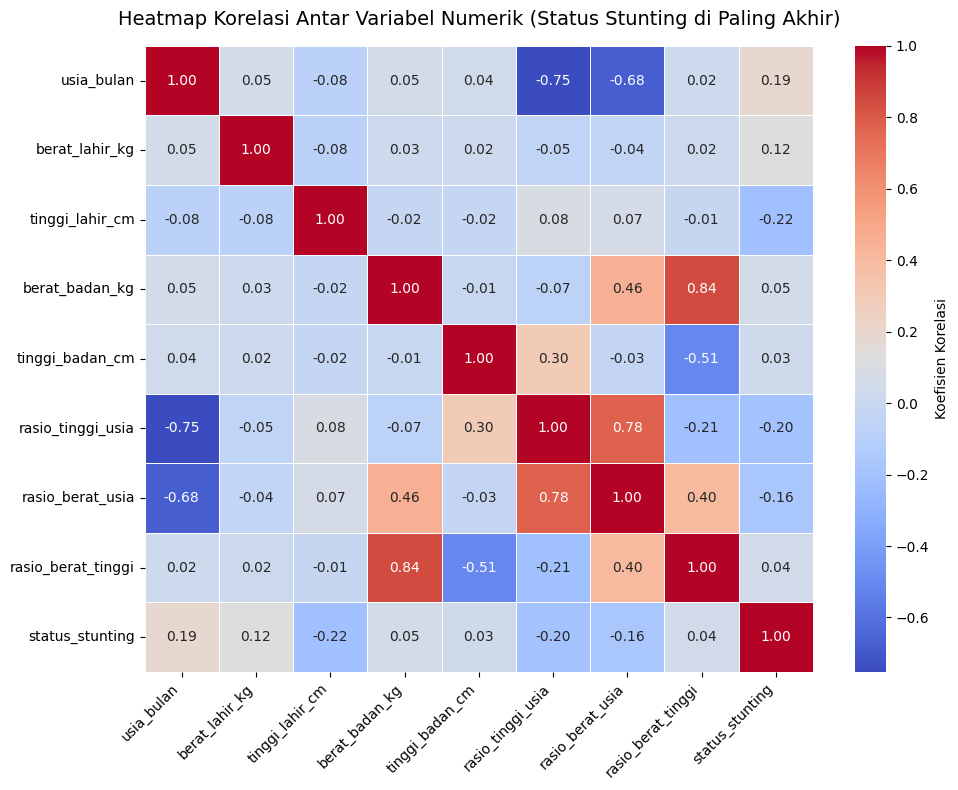

In [15]:
# --- Ambil semua kolom numerik ---
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# --- Pastikan status_stunting di paling akhir ---
if 'status_stunting' in numeric_cols:
    numeric_cols = [col for col in numeric_cols if col != 'status_stunting'] + ['status_stunting']

# --- Hitung korelasi antar variabel numerik ---
corr_matrix = df[numeric_cols].corr()

# --- Plot heatmap korelasi ---
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'label': 'Koefisien Korelasi'}
)

plt.title("Heatmap Korelasi Antar Variabel Numerik (Status Stunting di Paling Akhir)", fontsize=14, pad=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [16]:
from scipy.stats import ttest_ind
import pandas as pd


# --- Pisahkan data berdasarkan status stunting ---
stunting = df[df['status_stunting'] == 1]
non_stunting = df[df['status_stunting'] == 0]

# --- Fitur yang akan diuji ---
features = ['usia_bulan', 'berat_lahir_kg','tinggi_lahir_cm','berat_badan_kg', 'tinggi_badan_cm',
            'rasio_tinggi_usia', 'rasio_berat_usia', 'rasio_berat_tinggi']

# --- Lakukan t-test untuk tiap fitur ---
results = []
for f in features:
    t_stat, p_val = ttest_ind(stunting[f], non_stunting[f], equal_var=False, nan_policy='omit')
    results.append({'Fitur': f, 't_stat': round(t_stat, 3), 'p_value': round(p_val, 5),
                    'Signifikan': '✅ Ya' if p_val < 0.05 else '❌ Tidak'})

# --- Tampilkan hasil ---
hasil_df = pd.DataFrame(results)
print("📊 Hasil Uji Statistik (t-test dua sampel):")
print(hasil_df)


📊 Hasil Uji Statistik (t-test dua sampel):
                Fitur  t_stat  p_value Signifikan
0          usia_bulan  24.032  0.00000       ✅ Ya
1      berat_lahir_kg  10.506  0.00000       ✅ Ya
2     tinggi_lahir_cm -14.492  0.00000       ✅ Ya
3      berat_badan_kg   5.137  0.00000       ✅ Ya
4     tinggi_badan_cm   3.167  0.00155       ✅ Ya
5   rasio_tinggi_usia -17.997  0.00000       ✅ Ya
6    rasio_berat_usia -14.531  0.00000       ✅ Ya
7  rasio_berat_tinggi   4.111  0.00004       ✅ Ya


In [17]:
import pandas as pd
from scipy.stats import chi2_contingency

# Contoh uji hubungan antara status_asi dan status_stunting
table = pd.crosstab(data['jenis_kelamin'], data['status_stunting'])
chi2, p, dof, expected = chi2_contingency(table)

print("Chi-Square Statistic:", round(chi2, 3))
print("p-value:", round(p, 5))
print("Signifikan:", "✅ Ya" if p < 0.05 else "❌ Tidak")


Chi-Square Statistic: 105.557
p-value: 0.0
Signifikan: ✅ Ya


C:\Users\Zarah Sabrina\AppData\Local\Temp\ipykernel_33768\1383052847.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status_stunting', y=col, data=df, palette='Set2')


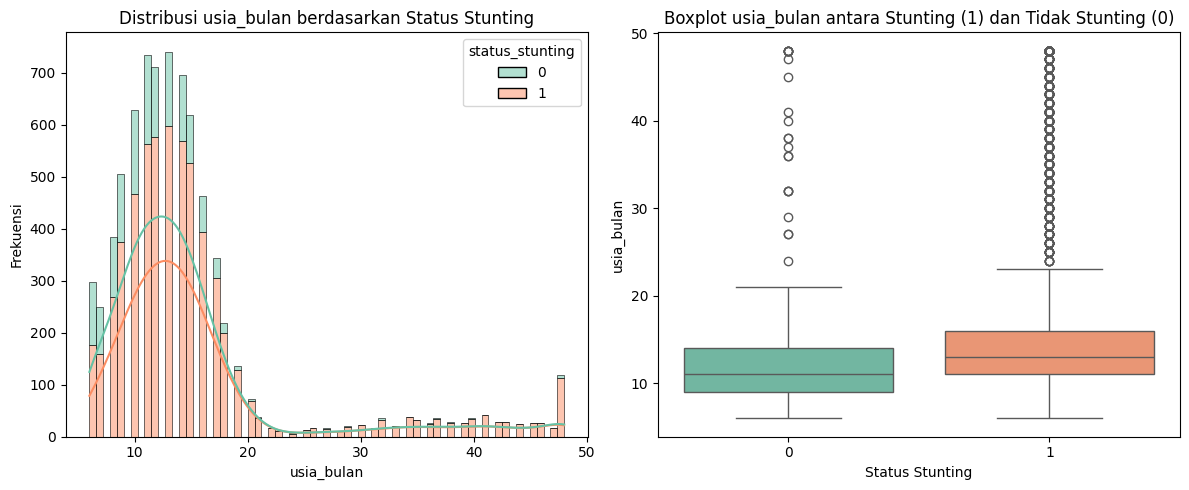

C:\Users\Zarah Sabrina\AppData\Local\Temp\ipykernel_33768\1383052847.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status_stunting', y=col, data=df, palette='Set2')


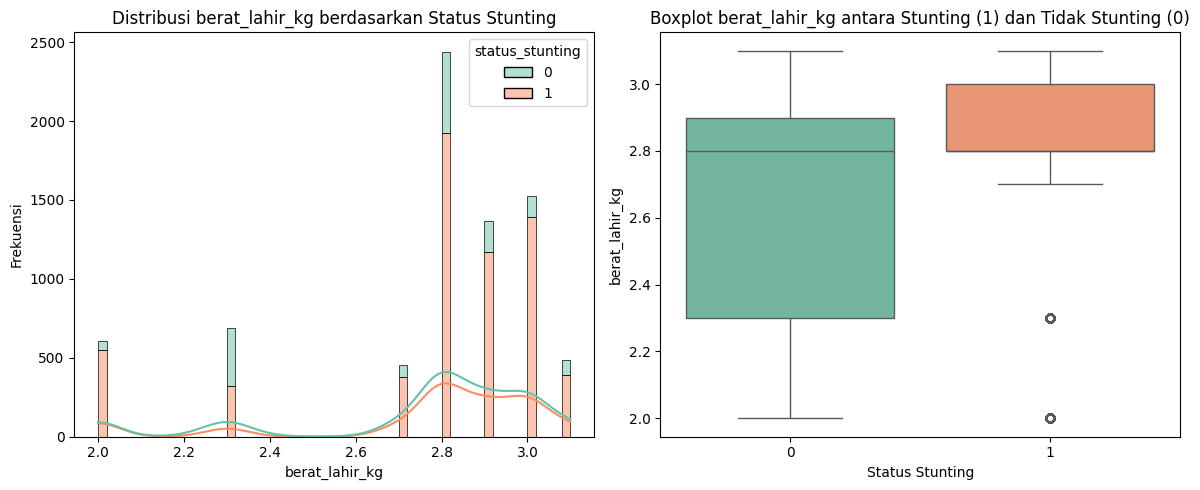

C:\Users\Zarah Sabrina\AppData\Local\Temp\ipykernel_33768\1383052847.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status_stunting', y=col, data=df, palette='Set2')


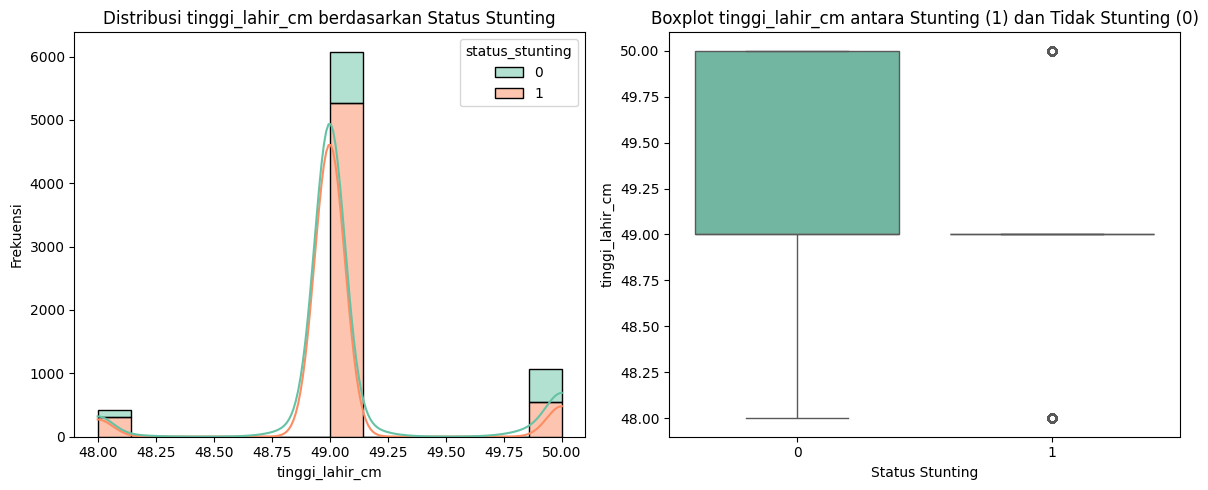

C:\Users\Zarah Sabrina\AppData\Local\Temp\ipykernel_33768\1383052847.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status_stunting', y=col, data=df, palette='Set2')


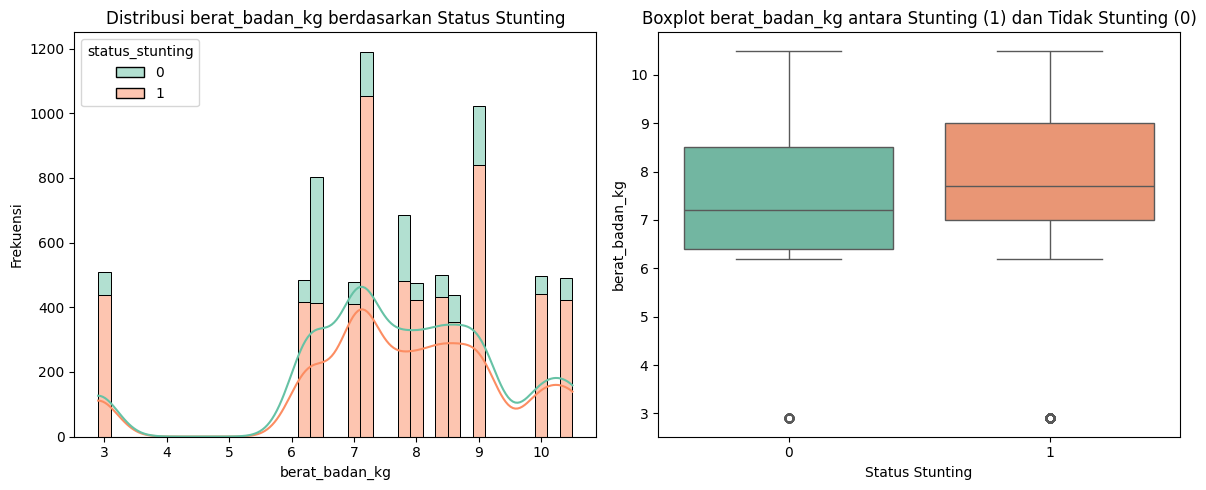

C:\Users\Zarah Sabrina\AppData\Local\Temp\ipykernel_33768\1383052847.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status_stunting', y=col, data=df, palette='Set2')


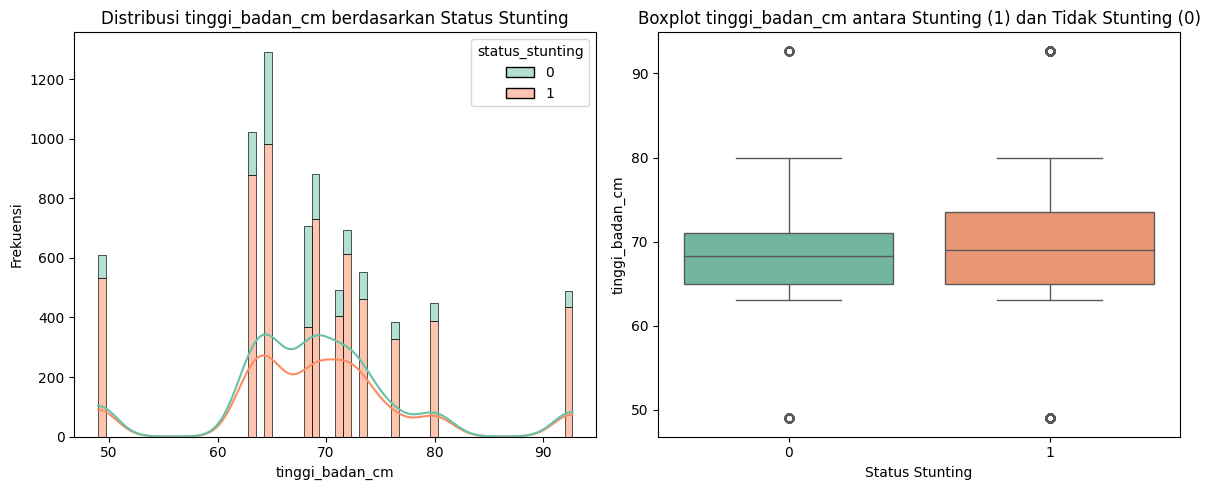

C:\Users\Zarah Sabrina\AppData\Local\Temp\ipykernel_33768\1383052847.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status_stunting', y=col, data=df, palette='Set2')


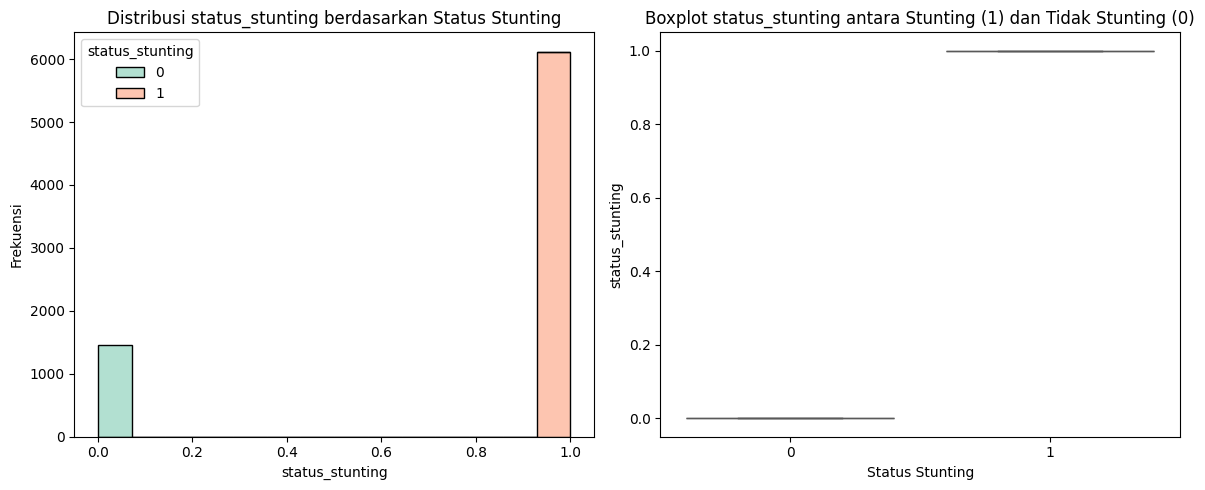

C:\Users\Zarah Sabrina\AppData\Local\Temp\ipykernel_33768\1383052847.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status_stunting', y=col, data=df, palette='Set2')


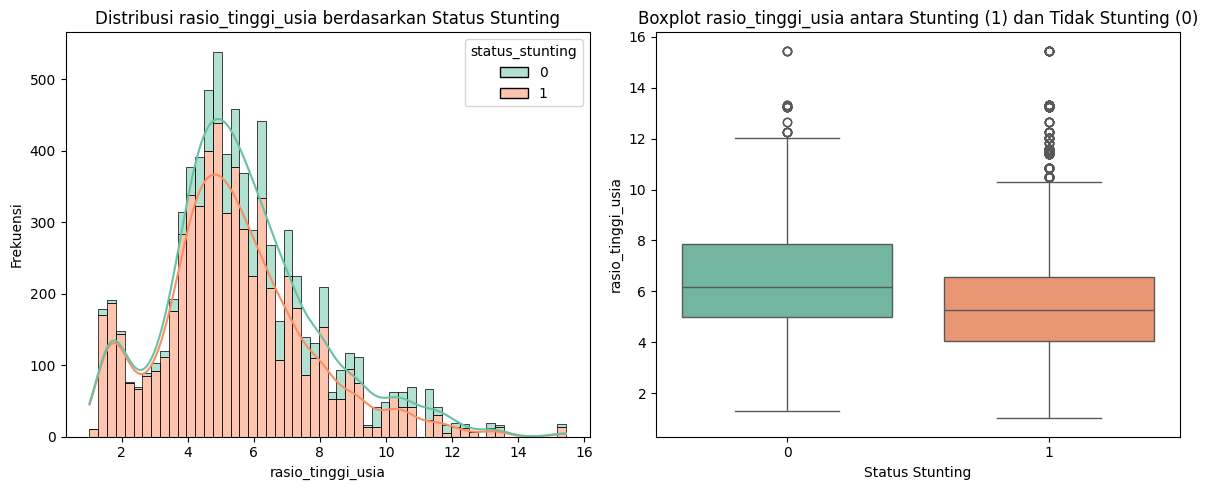

C:\Users\Zarah Sabrina\AppData\Local\Temp\ipykernel_33768\1383052847.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status_stunting', y=col, data=df, palette='Set2')


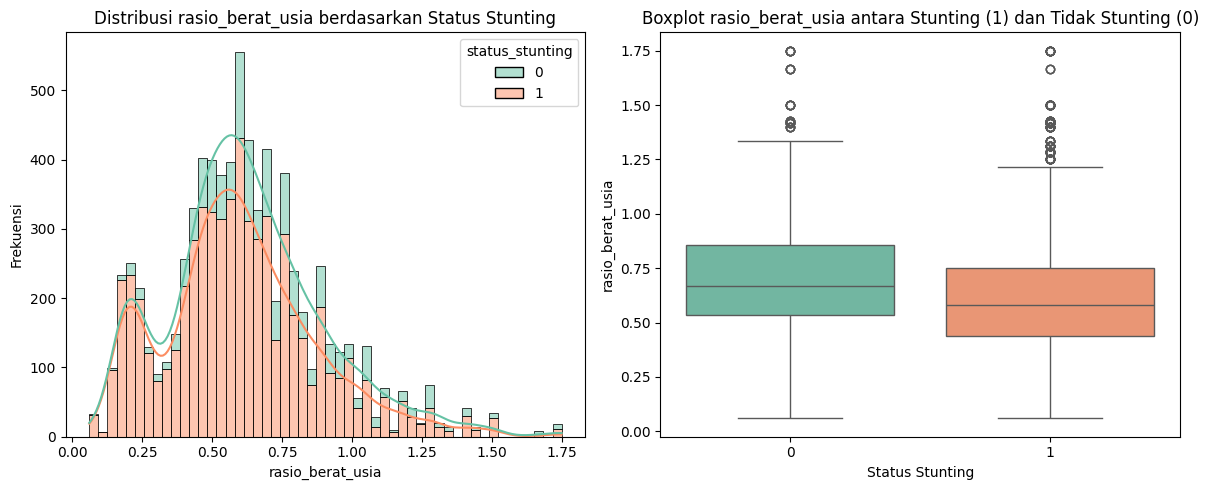

C:\Users\Zarah Sabrina\AppData\Local\Temp\ipykernel_33768\1383052847.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status_stunting', y=col, data=df, palette='Set2')


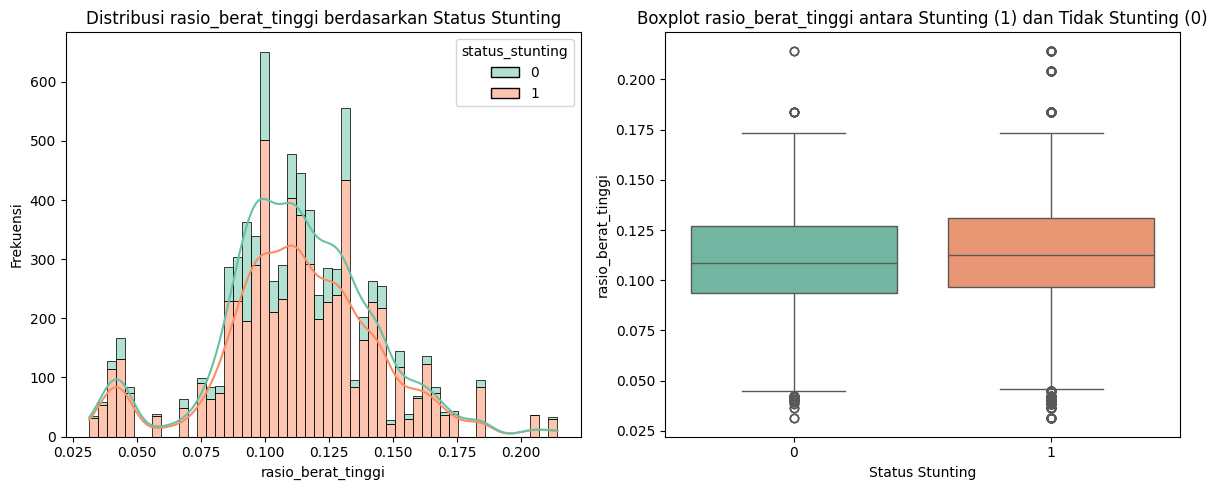

In [18]:
# --- Pilih semua kolom numerik ---
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# --- Loop visualisasi per kolom ---
for col in num_cols:
    plt.figure(figsize=(12,5))

    # Distribusi
    plt.subplot(1,2,1)
    sns.histplot(df, x=col, hue='status_stunting', kde=True, palette='Set2', multiple='stack')
    plt.title(f"Distribusi {col} berdasarkan Status Stunting", fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Frekuensi")

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x='status_stunting', y=col, data=df, palette='Set2')
    plt.title(f"Boxplot {col} antara Stunting (1) dan Tidak Stunting (0)", fontsize=12)
    plt.xlabel("Status Stunting")
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()


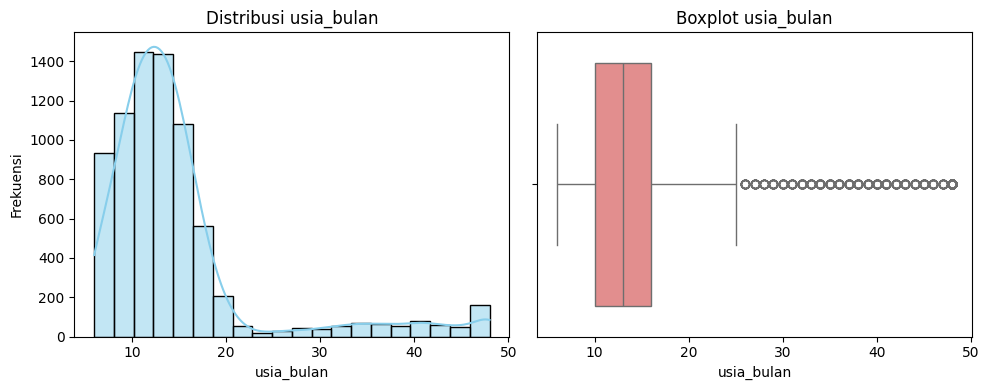

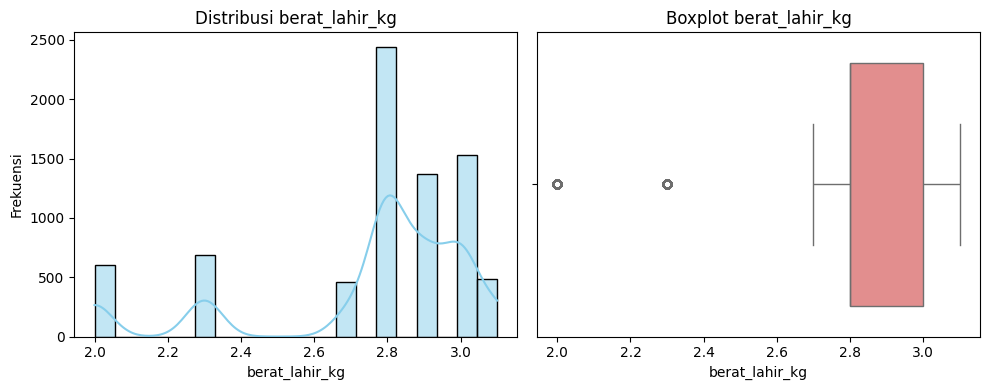

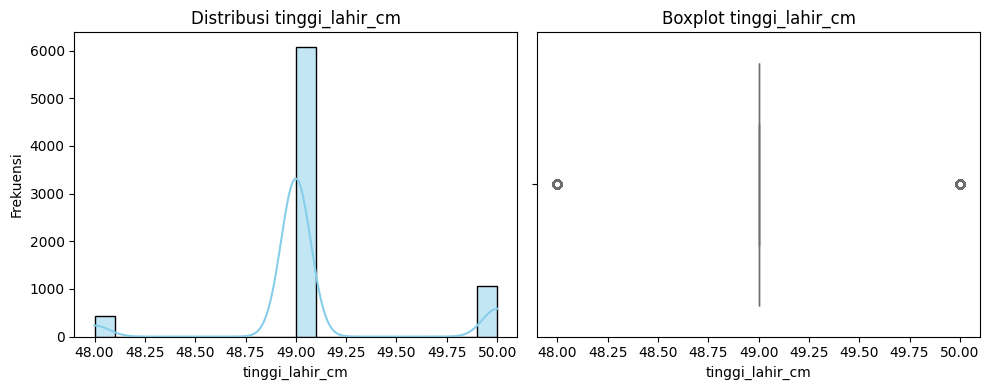

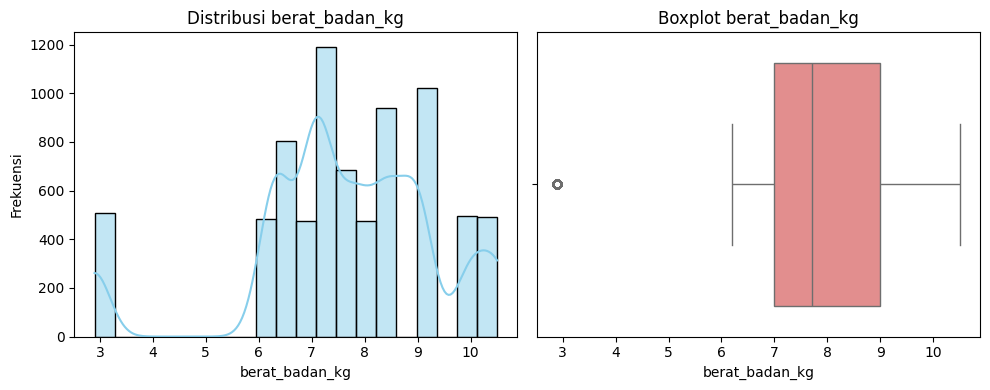

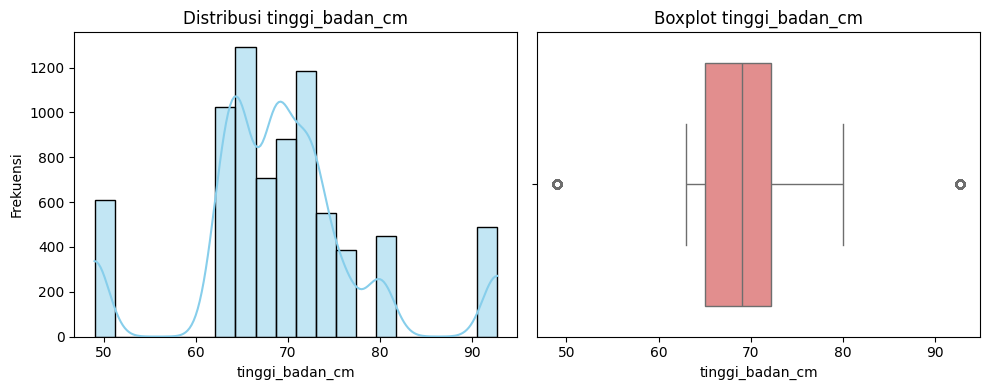

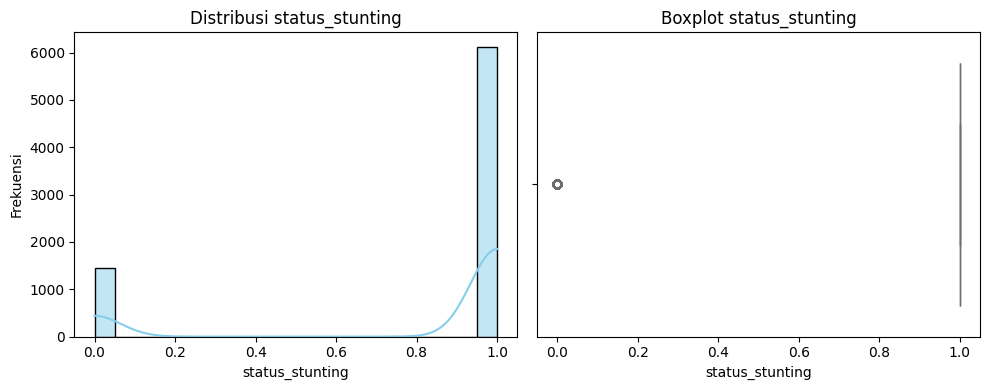

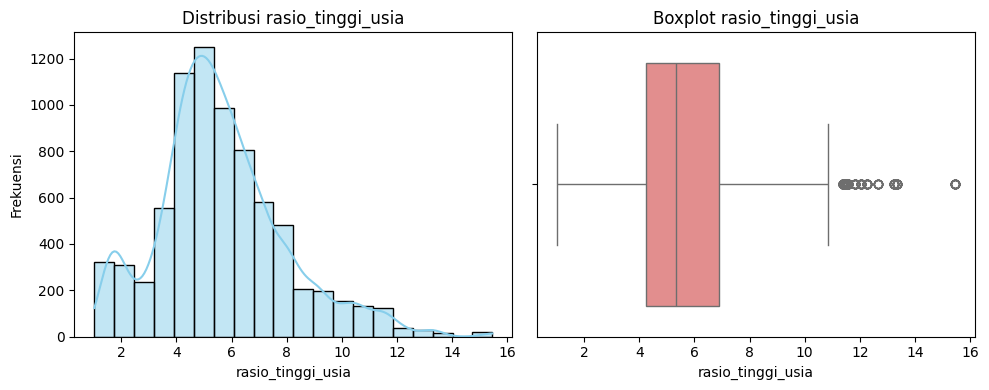

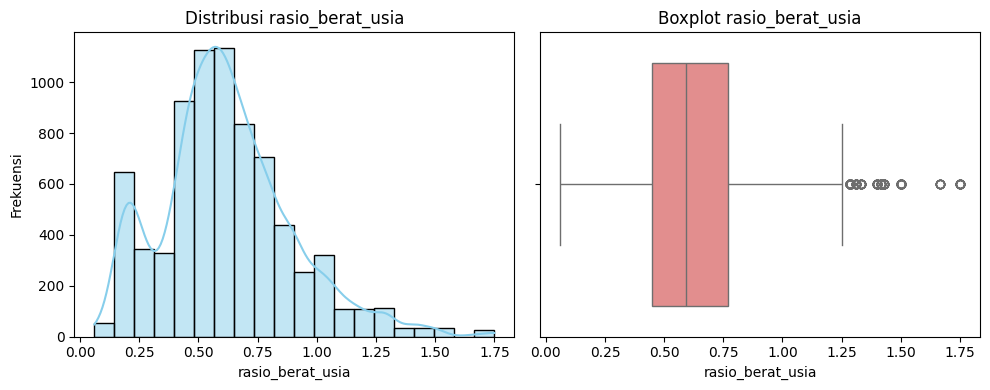

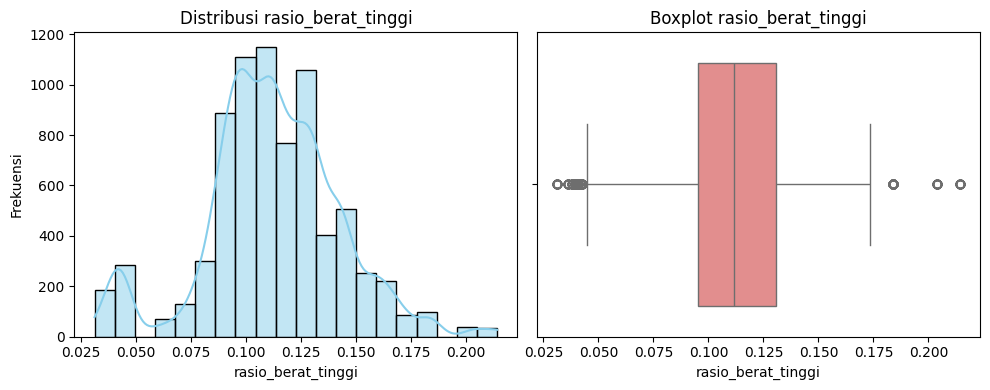

In [19]:
# --- Pilih semua kolom numerik ---
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# --- Visualisasi univariate untuk setiap kolom ---
for col in num_cols:
    plt.figure(figsize=(10,4))

    # Plot distribusi (histogram + KDE)
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color='skyblue', bins=20)
    plt.title(f'Distribusi {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

    # Plot boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot {col}', fontsize=12)
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

In [20]:
# Salin data biar aman
df_encoded = df.copy()

# Ubah nilai string menjadi angka
df_encoded['jenis_kelamin'] = df_encoded['jenis_kelamin'].replace({
    'Laki-laki': 0,
    'Perempuan': 1
})

# Cek hasil
print("✅ Kolom 'jenis_kelamin' berhasil diubah jadi numerik:")
print(df_encoded['jenis_kelamin'].value_counts())


✅ Kolom 'jenis_kelamin' berhasil diubah jadi numerik:
jenis_kelamin
0    4611
1    2962
Name: count, dtype: int64


C:\Users\Zarah Sabrina\AppData\Local\Temp\ipykernel_33768\330252439.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded['jenis_kelamin'] = df_encoded['jenis_kelamin'].replace({


In [21]:
from sklearn.model_selection import train_test_split

# --- Salin dataset ---
df_model = df_encoded.copy()  # hasil encoding jenis_kelamin

# --- Pisahkan fitur (X) dan label (y) ---
X = df_model[['jenis_kelamin', 'usia_bulan','berat_lahir_kg', 'tinggi_lahir_cm','berat_badan_kg', 'tinggi_badan_cm','rasio_berat_usia', 'rasio_tinggi_usia','rasio_berat_tinggi'
              ]]

y = df_model['status_stunting']

# --- Split data 70% train dan 30% test ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,          # 30% data untuk test
    random_state=42,        # supaya hasil konsisten
    stratify=y              # menjaga proporsi kelas tetap seimbang
)

# --- Cek hasil ---
print("✅ Data berhasil dibagi:")
print(f"Data latih (train): {X_train.shape[0]} baris ({(1-0.3)*100:.0f}%)")
print(f"Data uji (test):   {X_test.shape[0]} baris ({0.3*100:.0f}%)")

# --- Cek keseimbangan label ---
print("\nDistribusi label pada data latih:")
print(y_train.value_counts(normalize=True))
print("\nDistribusi label pada data uji:")
print(y_test.value_counts(normalize=True))


✅ Data berhasil dibagi:
Data latih (train): 5301 baris (70%)
Data uji (test):   2272 baris (30%)

Distribusi label pada data latih:
status_stunting
1    0.808149
0    0.191851
Name: proportion, dtype: float64

Distribusi label pada data uji:
status_stunting
1    0.808099
0    0.191901
Name: proportion, dtype: float64


In [22]:
X_train.head()

,jenis_kelamin,usia_bulan,berat_lahir_kg,tinggi_lahir_cm,berat_badan_kg,tinggi_badan_cm,rasio_berat_usia,rasio_tinggi_usia,rasio_berat_tinggi
1922,0,15,2.9,49,7.0,73.5,0.466667,4.900000,0.095238
2813,1,17,2.8,49,7.7,73.5,0.452941,4.323529,0.104762
3068,0,11,2.9,48,2.9,68.3,0.263636,6.209091,0.042460
3254,0,10,2.9,49,7.0,65.0,0.700000,6.500000,0.107692
5158,1,9,3.0,49,7.0,73.5,0.777778,8.166667,0.095238


In [23]:
import pandas as pd

# --- Salin data training ---
X_train_copy = X_train.copy()

# --- Ambil kolom numerik ---
num_cols = X_train_copy.select_dtypes(include=['float64', 'int64']).columns.tolist()

# --- Deteksi outlier menggunakan metode IQR ---
outlier_summary = []

for col in num_cols:
    Q1 = X_train_copy[col].quantile(0.25)
    Q3 = X_train_copy[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Hitung jumlah outlier di data training
    count_outlier = X_train_copy[(X_train_copy[col] < lower_bound) | (X_train_copy[col] > upper_bound)][col].count()
    percent_outlier = 100 * count_outlier / len(X_train_copy)

    outlier_summary.append({
        'Kolom': col,
        'Jumlah Outlier': count_outlier,
        'Persentase (%)': round(percent_outlier, 2),
        'Batas Bawah': round(lower_bound, 3),
        'Batas Atas': round(upper_bound, 3)
    })

# --- Buat DataFrame hasil ringkasan ---
outlier_df_train = pd.DataFrame(outlier_summary).sort_values(by='Persentase (%)', ascending=False)

print("📊 Ringkasan Outlier di Data Training (70%):")
print(outlier_df_train)


📊 Ringkasan Outlier di Data Training (70%):
                Kolom  Jumlah Outlier  Persentase (%)  Batas Bawah  Batas Atas
3     tinggi_lahir_cm            1040           19.62       49.000      49.000
2      berat_lahir_kg             915           17.26        2.500       3.300
5     tinggi_badan_cm             778           14.68       54.200      83.000
1          usia_bulan             486            9.17        1.000      25.000
4      berat_badan_kg             357            6.73        4.000      12.000
8  rasio_berat_tinggi             335            6.32        0.043       0.183
7   rasio_tinggi_usia             156            2.94        0.268      10.879
6    rasio_berat_usia             154            2.91       -0.034       1.257
0       jenis_kelamin               0            0.00       -1.500       2.500


In [24]:
import pandas as pd

# Ambil hanya kolom numerik dari data training
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

# Hitung skewness untuk setiap kolom numerik
skew_df = X_train[num_cols].skew().sort_values(ascending=False).reset_index()
skew_df.columns = ['Kolom', 'Skewness']

# Tambahkan kategori interpretasi
def interpret_skew(val):
    if abs(val) < 0.5:
        return 'Simetris (Normal)'
    elif 0.5 <= val < 1:
        return 'Sedikit Miring'
    else:
        return 'Sangat Miring'

skew_df['Kategori'] = skew_df['Skewness'].apply(interpret_skew)

print("📈 Ringkasan Skewness Data Training:")
display(skew_df)


📈 Ringkasan Skewness Data Training:


,Kolom,Skewness,Kategori
0,usia_bulan,2.341838,Sangat Miring
1,rasio_tinggi_usia,0.745170,Sedikit Miring
2,rasio_berat_usia,0.635890,Sedikit Miring
3,jenis_kelamin,0.458823,Simetris (Normal)
4,tinggi_lahir_cm,0.401541,Simetris (Normal)
5,tinggi_badan_cm,0.307189,Simetris (Normal)
6,rasio_berat_tinggi,-0.042334,Simetris (Normal)
7,berat_badan_kg,-0.855557,Sangat Miring
8,berat_lahir_kg,-1.455882,Sangat Miring


In [25]:
# --- Kolom yang ingin ditransformasi (berdasarkan hasil EDA & skewness) ---
#cols_to_log = ['usia_bulan','berat_badan_kg','berat_lahir_kg']

# --- Salin data agar aman ---
X_train_log = X_train.copy()
X_test_log = X_test.copy()

# --- Terapkan log transformasi ---
for col in cols_to_log:
    # np.log1p(x) = log(1 + x) → aman untuk nilai nol
    X_train_log[col] = np.log1p(X_train_log[col])
    X_test_log[col] = np.log1p(X_test_log[col])

print("✅ Log transformasi selesai untuk kolom:", cols_to_log)

# --- Cek hasil perubahan ---
X_train_log[cols_to_log].describe()

NameError: name 'cols_to_log' is not defined

In [ ]:
#import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Kolom yang sudah ditransformasi log ---
#cols_to_log = ['usia_bulan','rasio_tinggi_usia','rasio_berat_tinggi']

# --- Atur ukuran plot ---
plt.figure(figsize=(15, 10))

for i, col in enumerate(cols_to_log, 1):
    plt.subplot(3, 2, 2*i - 1)
    sns.histplot(X_train[col], kde=True, color='salmon', bins=30)
    plt.title(f"Distribusi SEBELUM Transformasi: {col}")
    plt.xlabel(col)
    plt.ylabel("Frekuensi")

    plt.subplot(3, 2, 2*i)
    sns.histplot(X_train_log[col], kde=True, color='skyblue', bins=30)
    plt.title(f"Distribusi SESUDAH Transformasi Log: {col}")
    plt.xlabel(col)
    plt.ylabel("Frekuensi")

plt.tight_layout()
plt.show()


In [26]:
#Handling Imbalanced
from imblearn.over_sampling import SMOTE
import pandas as pd

# --- Sebelum balancing ---
print("🔍 Distribusi label sebelum balancing (data train):")
print(y_train.value_counts())

# --- Inisialisasi SMOTE ---
sm = SMOTE(random_state=42, sampling_strategy='auto')

# --- Terapkan SMOTE hanya pada data training ---
X_train_bal, y_train_bal = sm.fit_resample(X_train_log, y_train)

# --- Setelah balancing ---
print("\n✅ Distribusi label setelah SMOTE (data train):")
print(pd.Series(y_train_bal).value_counts())


🔍 Distribusi label sebelum balancing (data train):
status_stunting
1    4284
0    1017
Name: count, dtype: int64

✅ Distribusi label setelah SMOTE (data train):
status_stunting
1    4284
0    4284
Name: count, dtype: int64


C:\Users\Zarah Sabrina\AppData\Local\Temp\ipykernel_33768\3966185935.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=before_counts.index, y=before_counts.values,
C:\Users\Zarah Sabrina\AppData\Local\Temp\ipykernel_33768\3966185935.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=after_counts.index, y=after_counts.values,


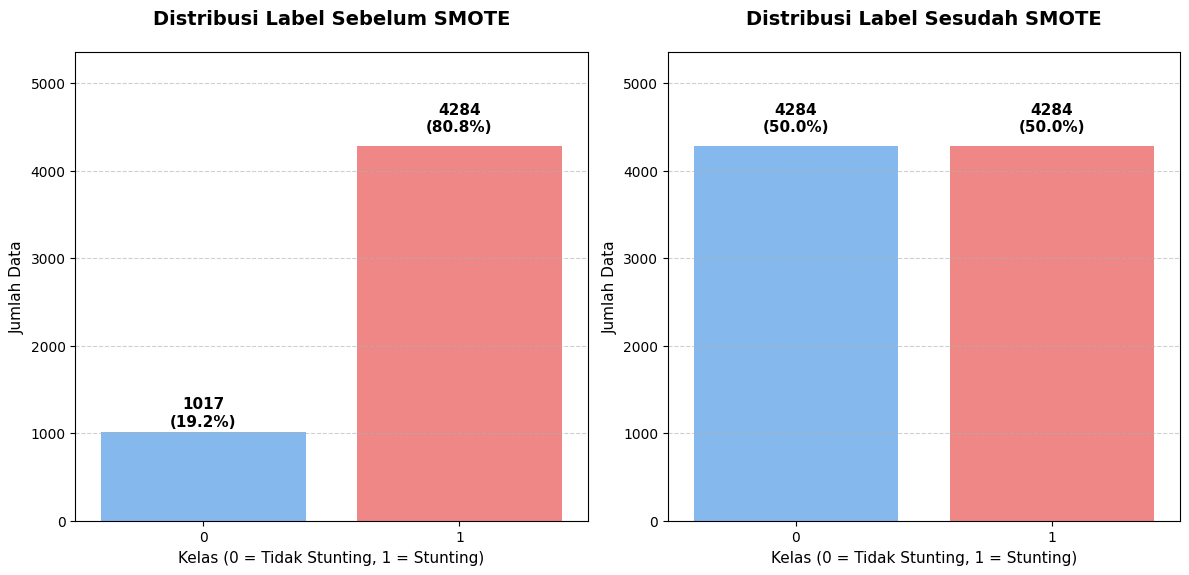

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import SMOTE

# --- Hitung distribusi sebelum SMOTE ---
before_counts = y_train.value_counts().sort_index()
before_percent = (y_train.value_counts(normalize=True) * 100).sort_index()

# --- Terapkan SMOTE pada data train ---
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train_log, y_train)

# --- Hitung distribusi setelah SMOTE ---
after_counts = pd.Series(y_train_bal).value_counts().sort_index()
after_percent = (pd.Series(y_train_bal).value_counts(normalize=True) * 100).sort_index()

# --- Buat visualisasi ---
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Warna konsisten (biru dan merah lembut)
palette_colors = ['#74B9FF', '#FF7675']

# Fungsi untuk menambah label teks
def add_labels(ax, counts, percents):
    for i, (v, p) in enumerate(zip(counts.values, percents.values)):
        ax.text(i, v + (v * 0.03), f'{v}\n({p:.1f}%)',
                ha='center', va='bottom', fontsize=11,
                color='black', fontweight='bold')

# --- Grafik Sebelum SMOTE ---
sns.barplot(x=before_counts.index, y=before_counts.values,
            palette=palette_colors, ax=axes[0])
add_labels(axes[0], before_counts, before_percent)
axes[0].set_title('Distribusi Label Sebelum SMOTE', fontsize=14, fontweight='bold', pad=20)
axes[0].set_xlabel('Kelas (0 = Tidak Stunting, 1 = Stunting)', fontsize=11)
axes[0].set_ylabel('Jumlah Data', fontsize=11)
axes[0].grid(axis='y', linestyle='--', alpha=0.6)
axes[0].set_ylim(0, max(before_counts.max(), after_counts.max()) * 1.25)  # beri ruang label

# --- Grafik Sesudah SMOTE ---
sns.barplot(x=after_counts.index, y=after_counts.values,
            palette=palette_colors, ax=axes[1])
add_labels(axes[1], after_counts, after_percent)
axes[1].set_title('Distribusi Label Sesudah SMOTE', fontsize=14, fontweight='bold', pad=20)
axes[1].set_xlabel('Kelas (0 = Tidak Stunting, 1 = Stunting)', fontsize=11)
axes[1].set_ylabel('Jumlah Data', fontsize=11)
axes[1].grid(axis='y', linestyle='--', alpha=0.6)
axes[1].set_ylim(0, max(before_counts.max(), after_counts.max()) * 1.25)

# --- Atur layout agar tidak terpotong ---
plt.tight_layout(rect=[0, 0, 1, 1])
plt.subplots_adjust(top=0.88)  # beri ruang ekstra di atas agar judul tidak ketimpa
plt.show()


In [28]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# --- Pisahkan fitur numerik dan kategorikal ---
num_cols = ['usia_bulan',
            'berat_lahir_kg','tinggi_lahir_cm',
            'berat_badan_kg', 'tinggi_badan_cm',
            'rasio_berat_usia', 'rasio_tinggi_usia','rasio_berat_tinggi'
           ]

cat_cols = ['jenis_kelamin']

# --- Inisialisasi scaler ---
scaler = StandardScaler()

# --- Fit transform hanya fitur numerik ---
X_train_scaled_num = scaler.fit_transform(X_train_bal[num_cols])
X_test_scaled_num = scaler.transform(X_test[num_cols])

# --- Gabungkan kembali dengan fitur kategorikal (tanpa scaling) ---
X_train_scaled = pd.concat([
    X_train_bal[cat_cols].reset_index(drop=True),
    pd.DataFrame(X_train_scaled_num, columns=num_cols)
], axis=1)

X_test_scaled = pd.concat([
    X_test[cat_cols].reset_index(drop=True),
    pd.DataFrame(X_test_scaled_num, columns=num_cols)
], axis=1)

# --- Cek hasil ---
print("✅ Standardisasi selesai (tanpa mengubah kolom kategorikal).")
print("\nRata-rata dan std fitur numerik setelah scaling:")
(X_train_scaled[num_cols].describe().loc[['mean', 'std']])



✅ Standardisasi selesai (tanpa mengubah kolom kategorikal).

Rata-rata dan std fitur numerik setelah scaling:


,usia_bulan,berat_lahir_kg,tinggi_lahir_cm,berat_badan_kg,tinggi_badan_cm,rasio_berat_usia,rasio_tinggi_usia,rasio_berat_tinggi
mean,7.961263e-17,1.305315e-15,3.404684e-15,-1.072283e-15,-1.708354e-16,-2.388379e-16,-1.078088e-16,2.359354e-16
std,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00,1.000058e+00


In [29]:
#Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, roc_auc_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# --- 1️⃣ Inisialisasi dan training model ---
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train_bal)

# --- 2️⃣ Prediksi pada training dan testing ---
y_train_pred = logreg.predict(X_train_scaled)
y_test_pred = logreg.predict(X_test_scaled)

# --- 3️⃣ Probabilitas untuk ROC-AUC ---
y_train_prob = logreg.predict_proba(X_train_scaled)[:, 1]
y_test_prob = logreg.predict_proba(X_test_scaled)[:, 1]

# --- 4️⃣ Evaluasi metrik utama ---
print("📊 Metrik Evaluasi Logistic Regression")
print("="*50)
print(f"Recall (Train): {recall_score(y_train_bal, y_train_pred):.4f}")
print(f"Recall (Test) : {recall_score(y_test, y_test_pred):.4f}")
print(f"ROC-AUC (Train): {roc_auc_score(y_train_bal, y_train_prob):.4f}")
print(f"ROC-AUC (Test) : {roc_auc_score(y_test, y_test_prob):.4f}")

#--- 5️⃣ (Opsional) Tampilkan classification report ---
print("\n--- Classification Report (Testing) ---")
print(classification_report(y_test, y_test_pred, target_names=['Tidak Stunting', 'Stunting']))

📊 Metrik Evaluasi Logistic Regression
Recall (Train): 0.6211
Recall (Test) : 0.6231
ROC-AUC (Train): 0.7368
ROC-AUC (Test) : 0.7092

--- Classification Report (Testing) ---
                precision    recall  f1-score   support

Tidak Stunting       0.30      0.67      0.41       436
      Stunting       0.89      0.62      0.73      1836

      accuracy                           0.63      2272
     macro avg       0.59      0.65      0.57      2272
  weighted avg       0.77      0.63      0.67      2272



In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, roc_auc_score, classification_report

# Model Random Forest tanpa tuning (pakai default)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train_bal)

# Prediksi
y_train_pred = rf.predict(X_train_scaled)
y_test_pred  = rf.predict(X_test_scaled)
y_train_prob = rf.predict_proba(X_train_scaled)[:, 1]
y_test_prob  = rf.predict_proba(X_test_scaled)[:, 1]

# Evaluasi
print("📊 Metrik Evaluasi Random Forest (Tanpa Tuning)")
print("="*50)
print(f"Recall (Train): {recall_score(y_train_bal, y_train_pred):.4f}")
print(f"Recall (Test) : {recall_score(y_test, y_test_pred):.4f}")
print(f"ROC-AUC (Train): {roc_auc_score(y_train_bal, y_train_prob):.4f}")
print(f"ROC-AUC (Test) : {roc_auc_score(y_test, y_test_prob):.4f}")

print("\n--- Classification Report (Testing) ---")
print(classification_report(y_test, y_test_pred, target_names=['Tidak Stunting','Stunting']))


📊 Metrik Evaluasi Random Forest (Tanpa Tuning)
Recall (Train): 0.9788
Recall (Test) : 0.8600
ROC-AUC (Train): 0.9988
ROC-AUC (Test) : 0.6999

--- Classification Report (Testing) ---
                precision    recall  f1-score   support

Tidak Stunting       0.38      0.36      0.37       436
      Stunting       0.85      0.86      0.85      1836

      accuracy                           0.76      2272
     macro avg       0.61      0.61      0.61      2272
  weighted avg       0.76      0.76      0.76      2272



In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, recall_score, classification_report
import numpy as np

# 1) Base model
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# 2) Ruang parameter (luas tapi tetap ringan)
param_dist = {
    "n_estimators":        [300, 500, 700, 900],
    "max_depth":           [8, 10, 12, None],
    "min_samples_split":   [2, 5, 10, 20],
    "min_samples_leaf":    [1, 2, 4, 6],
    "max_features":        ["sqrt", 0.5, "log2"],
    "bootstrap":           [True],
    "class_weight":        [None, "balanced_subsample"]
}

# 3) CV & scoring (multi-metrik)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {"auc": "roc_auc", "recall": "recall"}

# 4) RandomizedSearchCV
rs = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,                 # naikkan jika komputasi cukup
    scoring=scoring,
    refit="auc",               # model terbaik berdasar AUC
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=1,
    return_train_score=True
)

rs.fit(X_train_scaled, y_train_bal)

print("\n=== RandomizedSearchCV Results ===")
print("Best params:", rs.best_params_)
print(f"Best CV AUC (mean 5-fold): {rs.best_score_:.4f}")

# 5) Evaluasi Train/Test dengan model terbaik
best_rf = rs.best_estimator_
y_tr_prob = best_rf.predict_proba(X_train_scaled)[:, 1]
y_te_prob = best_rf.predict_proba(X_test_scaled)[:, 1]
y_tr_pred = (y_tr_prob >= 0.5).astype(int)
y_te_pred = (y_te_prob >= 0.5).astype(int)

print("\n📊 Evaluation (RandomizedSearchCV)")
print(f"ROC-AUC Train : {roc_auc_score(y_train_bal, y_tr_prob):.4f}")
print(f"ROC-AUC Test  : {roc_auc_score(y_test,      y_te_prob):.4f}")
print(f"Recall  Train : {recall_score(y_train_bal,  y_tr_pred):.4f}")
print(f"Recall  Test  : {recall_score(y_test,       y_te_pred):.4f}")
print("\n--- Classification Report (Test) ---")
print(classification_report(y_test, y_te_pred, target_names=['Tidak Stunting','Stunting']))


Fitting 5 folds for each of 30 candidates, totalling 150 fits

=== RandomizedSearchCV Results ===
Best params: {'n_estimators': 700, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 0.5, 'max_depth': None, 'class_weight': None, 'bootstrap': True}
Best CV AUC (mean 5-fold): 0.9342

📊 Evaluation (RandomizedSearchCV)
ROC-AUC Train : 0.9872
ROC-AUC Test  : 0.7435
Recall  Train : 0.9559
Recall  Test  : 0.8873

--- Classification Report (Test) ---
                precision    recall  f1-score   support

Tidak Stunting       0.45      0.38      0.41       436
      Stunting       0.86      0.89      0.87      1836

      accuracy                           0.79      2272
     macro avg       0.65      0.63      0.64      2272
  weighted avg       0.78      0.79      0.78      2272



In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, roc_auc_score, classification_report

dt = DecisionTreeClassifier(
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)
dt.fit(X_train_scaled, y_train_bal)

y_train_pred = dt.predict(X_train_scaled)
y_test_pred  = dt.predict(X_test_scaled)
y_train_prob = dt.predict_proba(X_train_scaled)[:, 1]
y_test_prob  = dt.predict_proba(X_test_scaled)[:, 1]

print("📊 Metrik Evaluasi Decision Tree")
print("="*50)
print(f"Recall (Train): {recall_score(y_train_bal, y_train_pred):.4f}")
print(f"Recall (Test) : {recall_score(y_test, y_test_pred):.4f}")
print(f"ROC-AUC (Train): {roc_auc_score(y_train_bal, y_train_prob):.4f}")
print(f"ROC-AUC (Test) : {roc_auc_score(y_test, y_test_prob):.4f}")

print("\n--- Classification Report (Testing) ---")
print(classification_report(y_test, y_test_pred, target_names=['Tidak Stunting','Stunting']))


📊 Metrik Evaluasi Decision Tree
Recall (Train): 0.9563
Recall (Test) : 0.7702
ROC-AUC (Train): 0.9990
ROC-AUC (Test) : 0.5829

--- Classification Report (Testing) ---
                precision    recall  f1-score   support

Tidak Stunting       0.29      0.39      0.33       436
      Stunting       0.84      0.77      0.80      1836

      accuracy                           0.70      2272
     macro avg       0.57      0.58      0.57      2272
  weighted avg       0.74      0.70      0.71      2272



In [35]:
from sklearn.svm import SVC
from sklearn.metrics import recall_score, roc_auc_score, classification_report

svm = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    probability=True,   # penting untuk ROC-AUC berbasis proba
    random_state=42
)
svm.fit(X_train_scaled, y_train_bal)

y_train_pred = svm.predict(X_train_scaled)
y_test_pred  = svm.predict(X_test_scaled)
y_train_prob = svm.predict_proba(X_train_scaled)[:, 1]
y_test_prob  = svm.predict_proba(X_test_scaled)[:, 1]

print("📊 Metrik Evaluasi SVM (RBF)")
print("="*50)
print(f"Recall (Train): {recall_score(y_train_bal, y_train_pred):.4f}")
print(f"Recall (Test) : {recall_score(y_test, y_test_pred):.4f}")
print(f"ROC-AUC (Train): {roc_auc_score(y_train_bal, y_train_prob):.4f}")
print(f"ROC-AUC (Test) : {roc_auc_score(y_test, y_test_prob):.4f}")

print("\n--- Classification Report (Testing) ---")
print(classification_report(y_test, y_test_pred, target_names=['Tidak Stunting','Stunting']))


📊 Metrik Evaluasi SVM (RBF)
Recall (Train): 0.7108
Recall (Test) : 0.6857
ROC-AUC (Train): 0.8272
ROC-AUC (Test) : 0.7521

--- Classification Report (Testing) ---
                precision    recall  f1-score   support

Tidak Stunting       0.35      0.71      0.47       436
      Stunting       0.91      0.69      0.78      1836

      accuracy                           0.69      2272
     macro avg       0.63      0.70      0.62      2272
  weighted avg       0.80      0.69      0.72      2272



In [38]:
from lightgbm import LGBMClassifier
from sklearn.metrics import recall_score, roc_auc_score, classification_report

# 1) Inisialisasi model tanpa parameter
lgbm = LGBMClassifier()

# 2) Latih model
lgbm.fit(X_train_scaled, y_train_bal)

# 3) Prediksi
y_train_pred = lgbm.predict(X_train_scaled)
y_test_pred  = lgbm.predict(X_test_scaled)
y_train_prob = lgbm.predict_proba(X_train_scaled)[:, 1]
y_test_prob  = lgbm.predict_proba(X_test_scaled)[:, 1]

# 4) Evaluasi
print("📊 Metrik Evaluasi LightGBM (tanpa parameter)")
print("="*55)
print(f"Recall (Train): {recall_score(y_train_bal, y_train_pred):.4f}")
print(f"Recall (Test) : {recall_score(y_test,      y_test_pred):.4f}")
print(f"ROC-AUC (Train): {roc_auc_score(y_train_bal, y_train_prob):.4f}")
print(f"ROC-AUC (Test) : {roc_auc_score(y_test,       y_test_prob):.4f}")

print("\n--- Classification Report (Testing) ---")
print(classification_report(y_test, y_test_pred, target_names=['Tidak Stunting','Stunting']))


[LightGBM] [Info] Number of positive: 4284, number of negative: 4284
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000864 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1564
[LightGBM] [Info] Number of data points in the train set: 8568, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
📊 Metrik Evaluasi LightGBM (tanpa parameter)
Recall (Train): 0.9589
Recall (Test) : 0.9216
ROC-AUC (Train): 0.9781
ROC-AUC (Test) : 0.7673

--- Classification Report (Testing) ---
                precision    recall  f1-score   support

Tidak Stunting       0.52      0.36      0.43       436
      Stunting       0.86      0.92      0.89      1836

      accuracy                           0.81      2272
     macro avg       0.69      0.64      0.66      2272
  weighted avg       0.80      0.81      0.80      2272



In [39]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import recall_score, roc_auc_score, classification_report
import numpy as np

# ===== 1) Model dasar =====
base = LGBMClassifier(
    objective="binary",
    boosting_type="gbdt",
    n_jobs=-1,
    random_state=42
)

# ===== 2) Ruang hyperparameter kecil (cepat tapi efektif) =====
param_dist = {
    "n_estimators":      [300, 600, 900],
    "learning_rate":     [0.03, 0.05, 0.07],
    "num_leaves":        [31, 63, 127],
    "max_depth":         [-1, 5, 7],
    "min_child_samples": [20, 40, 80],
    "subsample":         [0.8, 1.0],
    "colsample_bytree":  [0.8, 1.0],
    "reg_lambda":        [0.0, 1.0, 5.0],
}

# ===== 3) CV cepat =====
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

rs = RandomizedSearchCV(
    estimator=base,
    param_distributions=param_dist,
    n_iter=12,                 # ringkas -> cepat
    scoring="roc_auc",         # bisa ganti ke "recall" jika fokus recall
    n_jobs=-1,
    cv=cv,
    random_state=42,
    verbose=0,
    refit=True
)

# Data sudah scaled & balanced sesuai milikmu
rs.fit(X_train_scaled, y_train_bal)

print(">> Best CV ROC-AUC :", round(rs.best_score_, 4))
print(">> Best Params      :", rs.best_params_)

# ===== 4) Evaluasi model terbaik =====
best = rs.best_estimator_

y_train_pred = best.predict(X_train_scaled)
y_test_pred  = best.predict(X_test_scaled)

y_train_prob = best.predict_proba(X_train_scaled)[:, 1]
y_test_prob  = best.predict_proba(X_test_scaled)[:, 1]

print("\n📊 Metrik Evaluasi LightGBM (tuned, cepat)")
print("="*52)
print(f"Recall (Train):  {recall_score(y_train_bal, y_train_pred):.4f}")
print(f"Recall (Test) :  {recall_score(y_test,      y_test_pred):.4f}")
print(f"ROC-AUC (Train): {roc_auc_score(y_train_bal, y_train_prob):.4f}")
print(f"ROC-AUC (Test) : {roc_auc_score(y_test,       y_test_prob):.4f}")

print("\n--- Classification Report (Testing) ---")
print(classification_report(y_test, y_test_pred, target_names=['Tidak Stunting','Stunting']))

# ===== 5) (Opsional, cepat) Threshold sederhana untuk dorong recall =====
# thr = 0.40
# y_test_pred_thr = (y_test_prob >= thr).astype(int)
# print(f"\n>> Recall (Test) @ thr={thr}: {recall_score(y_test, y_test_pred_thr):.4f}")
# print(classification_report(y_test, y_test_pred_thr, target_names=['Tidak Stunting','Stunting']))


[LightGBM] [Info] Number of positive: 4284, number of negative: 4284
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003722 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1564
[LightGBM] [Info] Number of data points in the train set: 8568, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

In [31]:
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, roc_auc_score, classification_report

# Model XGBoost tanpa tuning (default params)
xgb = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    n_jobs=-1
)
xgb.fit(X_train_scaled, y_train_bal)

# Prediksi
y_train_pred = xgb.predict(X_train_scaled)
y_test_pred  = xgb.predict(X_test_scaled)
y_train_prob = xgb.predict_proba(X_train_scaled)[:, 1]
y_test_prob  = xgb.predict_proba(X_test_scaled)[:, 1]

# Evaluasi
print("📊 Metrik Evaluasi XGBoost (Tanpa Tuning)")
print("="*50)
print(f"Recall (Train): {recall_score(y_train_bal, y_train_pred):.4f}")
print(f"Recall (Test) : {recall_score(y_test, y_test_pred):.4f}")
print(f"ROC-AUC (Train): {roc_auc_score(y_train_bal, y_train_prob):.4f}")
print(f"ROC-AUC (Test) : {roc_auc_score(y_test, y_test_prob):.4f}")

print("\n--- Classification Report (Testing) ---")
print(classification_report(y_test, y_test_pred, target_names=['Tidak Stunting','Stunting']))


📊 Metrik Evaluasi XGBoost (Tanpa Tuning)
Recall (Train): 0.9645
Recall (Test) : 0.8905
ROC-AUC (Train): 0.9889
ROC-AUC (Test) : 0.7456

--- Classification Report (Testing) ---
                precision    recall  f1-score   support

Tidak Stunting       0.45      0.38      0.41       436
      Stunting       0.86      0.89      0.87      1836

      accuracy                           0.79      2272
     macro avg       0.65      0.63      0.64      2272
  weighted avg       0.78      0.79      0.78      2272



In [33]:
# ============================================================
# XGBoost Random Search + 5-Fold CV (no DMatrix, no spw, compat <1.6)
# ============================================================
import numpy as np, itertools
from sklearn.metrics import roc_auc_score, recall_score, classification_report
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

base = dict(
    objective="binary:logistic",
    eval_metric="auc",
    tree_method="hist",
    n_estimators=800,      # tetap cukup besar agar model kuat
    random_state=42,
    n_jobs=-1,
)

space = {
    "learning_rate":     [0.03, 0.05, 0.07],
    "max_depth":         [3, 4, 5],
    "min_child_weight":  [5, 8, 12],
    "gamma":             [0.0, 0.5, 1.0, 2.0],
    "subsample":         [0.7, 0.85, 1.0],
    "colsample_bytree":  [0.7, 0.85, 1.0],
    "reg_alpha":         [0.0, 1.0, 3.0],
    "reg_lambda":        [1.0, 2.0, 4.0],
}

keys = list(space.keys())
grid = list(itertools.product(*[space[k] for k in keys]))

rng = np.random.default_rng(42)
sampled_idx = rng.choice(len(grid), size=min(24, len(grid)), replace=False)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best = {"auc": -np.inf, "params": None}

for i in sampled_idx:
    hp = dict(zip(keys, grid[i]))
    params = {**base, **hp}
    aucs = []

    for tr_idx, va_idx in cv.split(X_train, y_train):
        if hasattr(X_train, "iloc"):
            X_tr, X_va = X_train.iloc[tr_idx], X_train.iloc[va_idx]
            y_tr, y_va = y_train.iloc[tr_idx], y_train.iloc[va_idx]
        else:
            X_tr, X_va = X_train[tr_idx], X_train[va_idx]
            y_tr, y_va = y_train[tr_idx], y_train[va_idx]

        clf = XGBClassifier(**params)
        clf.fit(X_tr, y_tr, verbose=False)

        proba_va = clf.predict_proba(X_va)[:, 1]
        aucs.append(roc_auc_score(y_va, proba_va))

    auc_mean = float(np.mean(aucs))
    if auc_mean > best["auc"]:
        best = {"auc": auc_mean, "params": params}

print(">> RandomSearch best CV AUC:", round(best["auc"], 4))
print(">> Best params:", {k: best["params"][k] for k in keys})

clf_final = XGBClassifier(**best["params"])
clf_final.fit(X_train, y_train, verbose=False)

p_tr = clf_final.predict_proba(X_train)[:, 1]
p_te = clf_final.predict_proba(X_test)[:, 1]

ytr_pred = (p_tr >= 0.5).astype(int)
yte_pred = (p_te >= 0.5).astype(int)

print("\n📊 XGBoost (RandomSearch CV, compat <1.6)")
print("ROC-AUC Train :", round(roc_auc_score(y_train, p_tr), 4))
print("ROC-AUC Test  :", round(roc_auc_score(y_test,  p_te), 4))
print("Recall Train  :", round(recall_score(y_train, ytr_pred), 4))
print("Recall Test   :", round(recall_score(y_test,  yte_pred), 4))
print("\n--- Classification Report (Test) ---")
print(classification_report(y_test, yte_pred, target_names=["Tidak Stunting","Stunting"]))


>> RandomSearch best CV AUC: 0.7997
>> Best params: {'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 8, 'gamma': 2.0, 'subsample': 0.85, 'colsample_bytree': 0.7, 'reg_alpha': 1.0, 'reg_lambda': 2.0}

📊 XGBoost (RandomSearch CV, compat <1.6)
ROC-AUC Train : 0.8364
ROC-AUC Test  : 0.7997
Recall Train  : 0.9631
Recall Test   : 0.9564

--- Classification Report (Test) ---
                precision    recall  f1-score   support

Tidak Stunting       0.64      0.33      0.44       436
      Stunting       0.86      0.96      0.90      1836

      accuracy                           0.84      2272
     macro avg       0.75      0.64      0.67      2272
  weighted avg       0.82      0.84      0.81      2272



In [ ]:
# ============================================================
# XGBoost Grid Search + 5-Fold CV (tanpa DMatrix & spw)
# ============================================================
import numpy as np, itertools
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, recall_score, classification_report
from xgboost import XGBClassifier

# 1) Base params (AUC-first) — TANPA scale_pos_weight
base = dict(
    objective="binary:logistic",
    eval_metric="auc",
    tree_method="hist",
    n_estimators=2500,      # besar; early_stopping akan memangkas
    random_state=42,
    n_jobs=-1,
)

# 2) Grid ketat (sepadan dengan versi DMatrix)
grid_space = {
    "learning_rate":     [0.03, 0.05],   # (eta)
    "max_depth":         [3, 4],
    "min_child_weight":  [5, 8],
    "gamma":             [0.0, 1.0],
    "subsample":         [0.8, 1.0],
    "colsample_bytree":  [0.8, 1.0],
    "reg_alpha":         [0.0, 1.0],     # (alpha)
    "reg_lambda":        [2.0, 4.0],     # (lambda)
}

keys = list(grid_space.keys())
grid = list(itertools.product(*[grid_space[k] for k in keys]))

# 3) 5-Fold CV dengan early stopping per fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best = {"auc": -np.inf, "params": None, "nrounds": None}

for combo in grid:
    hp = dict(zip(keys, combo))
    params = {**base, **hp}

    aucs, best_iters = [], []

    for tr_idx, va_idx in cv.split(X_train, y_train):
        X_tr, X_va = X_train[tr_idx], X_train[va_idx]
        y_tr, y_va = y_train[tr_idx], y_train[va_idx]

        clf = XGBClassifier(**params)
        clf.fit(
            X_tr, y_tr,
            eval_set=[(X_va, y_va)],
            early_stopping_rounds=150,
            verbose=False
        )

        # pakai iterasi terbaik untuk prediksi validasi
        if getattr(clf, "best_iteration_", None) is not None:
            proba_va = clf.predict_proba(
                X_va, iteration_range=(0, clf.best_iteration_ + 1)
            )[:, 1]
            best_iters.append(clf.best_iteration_ + 1)
        else:
            proba_va = clf.predict_proba(X_va)[:, 1]

        aucs.append(roc_auc_score(y_va, proba_va))

    auc_mean = float(np.mean(aucs))
    nrounds  = int(np.mean(best_iters)) if best_iters else params["n_estimators"]

    if auc_mean > best["auc"]:
        best = {"auc": auc_mean, "params": params, "nrounds": nrounds}

print(">> GridSearch best CV AUC:", round(best["auc"], 4))
print(">> Best rounds (avg):", best["nrounds"])
print(">> Best params:", {k: best["params"][k] for k in keys})

# 4) Train final di seluruh TRAIN (buffer kecil di atas best rounds)
final_rounds  = int(np.clip(best["nrounds"] + 30, 200, 3000))
final_params  = {**best["params"], "n_estimators": final_rounds}
clf_final = XGBClassifier(**final_params)
clf_final.fit(X_train, y_train, verbose=False)

# 5) Evaluasi di TRAIN/TEST
p_tr = clf_final.predict_proba(X_train)[:, 1]
p_te = clf_final.predict_proba(X_test)[:, 1]

ytr_pred = (p_tr >= 0.5).astype(int)
yte_pred = (p_te >= 0.5).astype(int)  # jika error, pastikan p_te adalah array 1D probabilitas

print("\n📊 XGBoost (GridSearch CV, no DMatrix & no spw)")
print("ROC-AUC Train :", round(roc_auc_score(y_train, p_tr), 4))
print("ROC-AUC Test  :", round(roc_auc_score(y_test,  p_te), 4))
print("Recall Train  :", round(recall_score(y_train, ytr_pred), 4))
print("Recall Test   :", round(recall_score(y_test,  yte_pred), 4))
print("\n--- Classification Report (Test) ---")
print(classification_report(y_test, yte_pred, target_names=["Tidak Stunting","Stunting"]))



🔎 Top 20 Feature Importance (berdasarkan GAIN):
                      gain   weight    cover  gain_norm  weight_norm  cover_norm
tinggi_lahir_cm    42.7786  82.0000 409.7240     0.4000       0.0724      0.1577
usia_bulan         11.7402  68.0000 355.0399     0.1098       0.0601      0.1367
berat_lahir_kg     10.7944 193.0000 313.3993     0.1009       0.1705      0.1206
rasio_tinggi_usia   9.6833 128.0000 271.1340     0.0905       0.1131      0.1044
tinggi_badan_cm     8.9389 148.0000 292.3213     0.0836       0.1307      0.1125
berat_badan_kg      7.4835 189.0000 288.4300     0.0700       0.1670      0.1110
jenis_kelamin       5.6938  38.0000 234.5825     0.0532       0.0336      0.0903
rasio_berat_usia    5.4160 123.0000 247.7466     0.0506       0.1087      0.0954
rasio_berat_tinggi  4.4227 163.0000 185.7083     0.0414       0.1440      0.0715


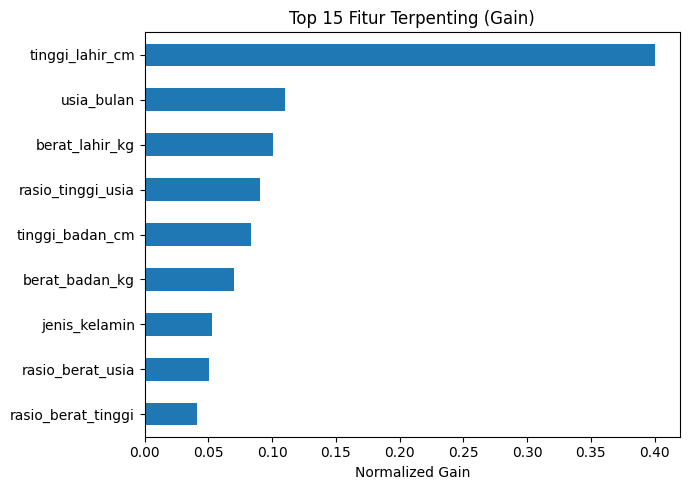

In [41]:
# ===== Feature Importance untuk XGBClassifier (fix error) =====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Ambil nama fitur (kalau ada kolom dataframe)
if hasattr(X_train, "columns"):
    feat_names = list(X_train.columns)
else:
    feat_names = [f"f{i}" for i in range(X_train.shape[1])]

# 2) Ambil importance langsung (XGBoost sudah simpan nama asli)
booster = clf_final.get_booster()

gain_s   = pd.Series(booster.get_score(importance_type="gain"),   name="gain", dtype=float)
weight_s = pd.Series(booster.get_score(importance_type="weight"), name="weight", dtype=float)
cover_s  = pd.Series(booster.get_score(importance_type="cover"),  name="cover", dtype=float)

# 3) Gabungkan, isi 0 jika ada fitur tidak muncul
fi = pd.concat([gain_s, weight_s, cover_s], axis=1).fillna(0.0)

# 4) Normalisasi biar proporsional
fi["gain_norm"]   = fi["gain"]   / (fi["gain"].sum()   + 1e-12)
fi["weight_norm"] = fi["weight"] / (fi["weight"].sum() + 1e-12)
fi["cover_norm"]  = fi["cover"]  / (fi["cover"].sum()  + 1e-12)

# 5) Urutkan berdasarkan gain
fi_sorted = fi.sort_values("gain_norm", ascending=False)

print("\n🔎 Top 20 Feature Importance (berdasarkan GAIN):")
print(fi_sorted.head(20).to_string(float_format=lambda x: f"{x:,.4f}"))

# 6) (Opsional) Visualisasi cepat
topk = 15
fi_sorted.head(topk)["gain_norm"].iloc[::-1].plot(kind="barh", figsize=(7,5))
plt.title(f"Top {topk} Fitur Terpenting (Gain)")
plt.xlabel("Normalized Gain")
plt.tight_layout()
plt.show()



Top 15 Global Importance (mean |SHAP|):
           feature  mean_abs_shap
    berat_lahir_kg       0.388470
   tinggi_lahir_cm       0.380204
   tinggi_badan_cm       0.283531
    berat_badan_kg       0.266194
 rasio_tinggi_usia       0.243984
  rasio_berat_usia       0.141560
        usia_bulan       0.132383
     jenis_kelamin       0.107291
rasio_berat_tinggi       0.072260


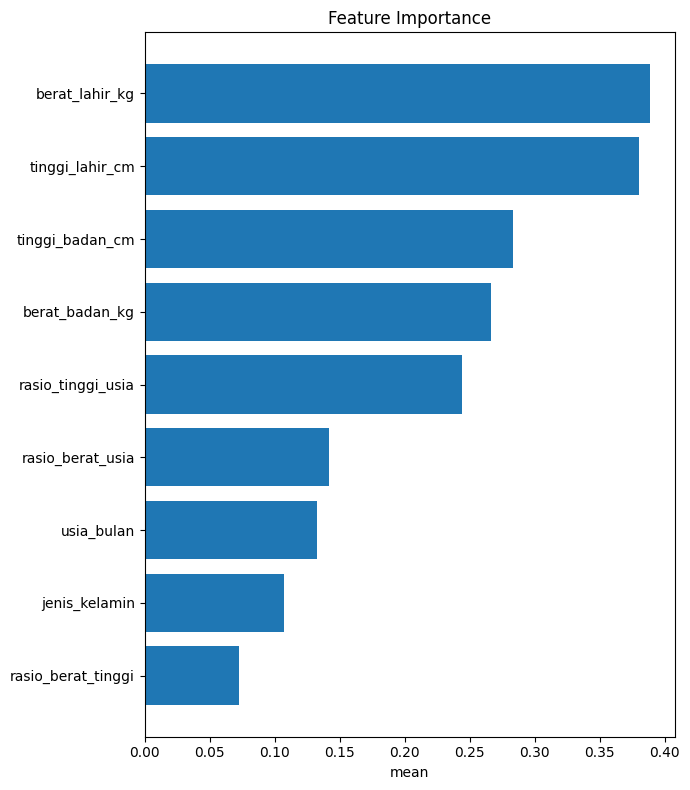

In [51]:
# ============================================================
# SHAP-like Global Importance via pred_contribs (XGBClassifier)
# ============================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

# --- 0) Ambil booster & tentukan urutan fitur yang benar ---
booster = clf_final.get_booster()

# Prioritas urutan fitur: booster.feature_names -> kolom DataFrame -> fallback f{i}
if getattr(booster, "feature_names", None):
    feature_names = list(booster.feature_names)
elif hasattr(X_train, "columns"):
    feature_names = list(X_train.columns)
else:
    feature_names = [f"f{i}" for i in range(X_train.shape[1])]

# Susun X_train sesuai urutan feature_names untuk mencegah mismatch
if hasattr(X_train, "loc"):
    X_train_ordered = X_train.loc[:, feature_names]
else:
    # asumsi ndarray sudah sesuai urutan; jika tidak, map manual sesuai pipeline kamu
    X_train_ordered = X_train

# --- 1) Ambil sampel (opsional agar cepat) ---
n_sample = min(5000, X_train_ordered.shape[0])
X_sample = X_train_ordered.iloc[:n_sample] if hasattr(X_train_ordered, "iloc") else X_train_ordered[:n_sample]

# --- 2) Hitung SHAP internal XGBoost (pred_contribs=True) ---
#    Booster.predict memerlukan DMatrix
dm_sample = xgb.DMatrix(X_sample, feature_names=feature_names)

# pred_contribs -> matriks (n_sample, n_feature + 1); kolom terakhir = bias term
shap_vals = booster.predict(dm_sample, pred_contribs=True)
shap_vals = np.asarray(shap_vals)
shap_feat = shap_vals[:, :-1]  # buang bias

# --- 3) Global importance = mean(|SHAP|) per fitur ---
shap_importance = np.abs(shap_feat).mean(axis=0)
imp_shap = (pd.DataFrame({"feature": feature_names, "mean_abs_shap": shap_importance})
              .sort_values("mean_abs_shap", ascending=False)
              .reset_index(drop=True))

print("\nTop 15 Global Importance (mean |SHAP|):")
print(imp_shap.head(15).to_string(index=False))

# --- 4) Plot Top-N (SHAP) ---
TOPN = 20
plt.figure(figsize=(7, 8))
plt.barh(imp_shap.head(TOPN)["feature"][::-1], imp_shap.head(TOPN)["mean_abs_shap"][::-1])
plt.title("Feature Importance")
plt.xlabel("mean")
plt.tight_layout()
plt.show()

# --- 5) (Opsional) Simpan ke file ---
# imp_all.to_csv("xgb_importance_model_based.csv", index=False)  # jika kamu sudah buat imp_all sebelumnya
# imp_shap.to_csv("xgb_importance_shap.csv", index=False)
# print("\n>> Disimpan: xgb_importance_model_based.csv & xgb_importance_shap.csv")


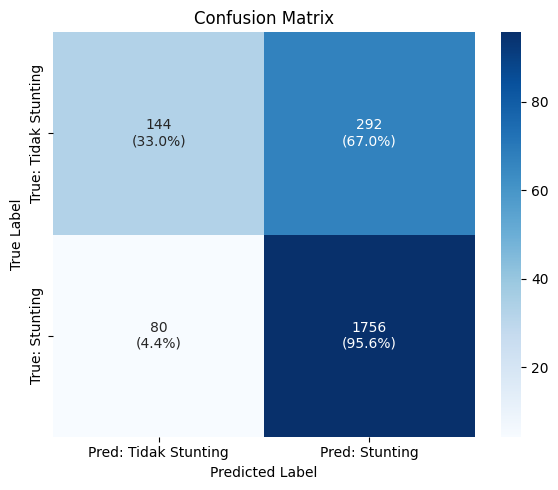


📊 Confusion Matrix (angka):
 [[ 144  292]
 [  80 1756]]

📈 Confusion Matrix (persentase per baris):
 [[33.03 66.97]
 [ 4.36 95.64]]


In [49]:
# ============================================================
# CONFUSION MATRIX (dengan Persentase)
# ============================================================
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1) Hitung confusion matrix (angka absolut)
cm = confusion_matrix(y_test, yte_pred)

# 2) Ubah ke persentase
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# 3) Buat label gabungan (angka + persentase)
labels = np.array([
    [f"{cm[i, j]}\n({cm_percent[i, j]:.1f}%)" for j in range(cm.shape[1])]
    for i in range(cm.shape[0])
])

# 4) Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm_percent, annot=labels, fmt='', cmap='Blues',
            xticklabels=['Pred: Tidak Stunting', 'Pred: Stunting'],
            yticklabels=['True: Tidak Stunting', 'True: Stunting'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# 5) (Opsional) Cetak juga angka & persentase di terminal
print("\n📊 Confusion Matrix (angka):\n", cm)
print("\n📈 Confusion Matrix (persentase per baris):\n", np.round(cm_percent, 2))


In [48]:
import joblib

# Simpan model hasil tuning
joblib.dump(clf_final, "model_xgb_tuned.joblib")

# Simpan juga scaler yang kamu pakai sebelumnya (kalau ada)
joblib.dump(scaler, "scaler.joblib")

print("Model dan scaler tersimpan sebagai file .joblib")


Model dan scaler tersimpan sebagai file .joblib
